In [2]:
import json
import bz2
import os
import sys
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.integrate import odeint

In [3]:
dir_files='/home/amin/Downloads/2020-rki-archive-master/data/2_parsed'

In [4]:
ls_all_data=os.listdir(dir_files)


In [5]:
ls_all_data=[ind for ind in ls_all_data if ind.endswith('bz2')]

In [6]:
dates=[]
S=[]
I=[]
R=[]
indexer=0
# For loop to go through individual json files
for i in trange(len(ls_all_data)):
    file_i=ls_all_data[i]
    # extract the date of RKI data report from the filename
    dates.append(file_i.split('_')[1].split('.')[0])
    
    # Files are in .bz2 extension. Here we extract the content of bz2
    with bz2.open(os.path.join(dir_files,file_i), "rt") as bzinput:
        data = []
        # the content of .bz2 is a .json file. This for loop is 
        # not necessary since we know the .bz2 file has only one 
        # file not multiple, but to be on the safe side, we 
        # enumerate the bz2 file.
        for i, line in enumerate(bzinput):
            # the content of the bz2 file is a json file
            # here we store the json file as a python 
            # dictionary (data_e)
            data_e = json.loads(line)
            data.append(data_e)
        I0=0
        R0=0
        # a for loop over the elements of the dictionary 
        # data_e. Each element is a record for a given 
        # age group, gender, state and reference date
        for j in range(len(data[0])):
            try:
                if data[0][j]['NeuerFall']!=0:
                    I0+=data[0][j]['AnzahlFall']
            except:
                pass
        
            try:
                if data[0][j]['NeuGenesen']!=0:
                    R0+=data[0][j]['AnzahlGenesen']
            except:
                pass

     # Here for the sake of simplicity I considered 
    # that every record in the dictionry corresponds
    # to one single person which is not the case 
    # because the data is aggregated per age group
    # gender and state           
            
    S.append(len(data[0]))
    I.append(I0)
    R.append(R0)
    indexer+=1
    
    

100%|██████████| 256/256 [16:42<00:00,  3.91s/it]


In [7]:
S=S[:len(S)-18]
I=np.array(I[3:len(I)-15])
R=np.array(R[18:])
dates=dates[:len(dates)-18]

In [8]:
dates=[date_i.split('-')[1]+'-'+date_i.split('-')[2] for date_i in dates]
for jj in range(len(dates)):
    if jj%5>0:
        dates[jj]=''

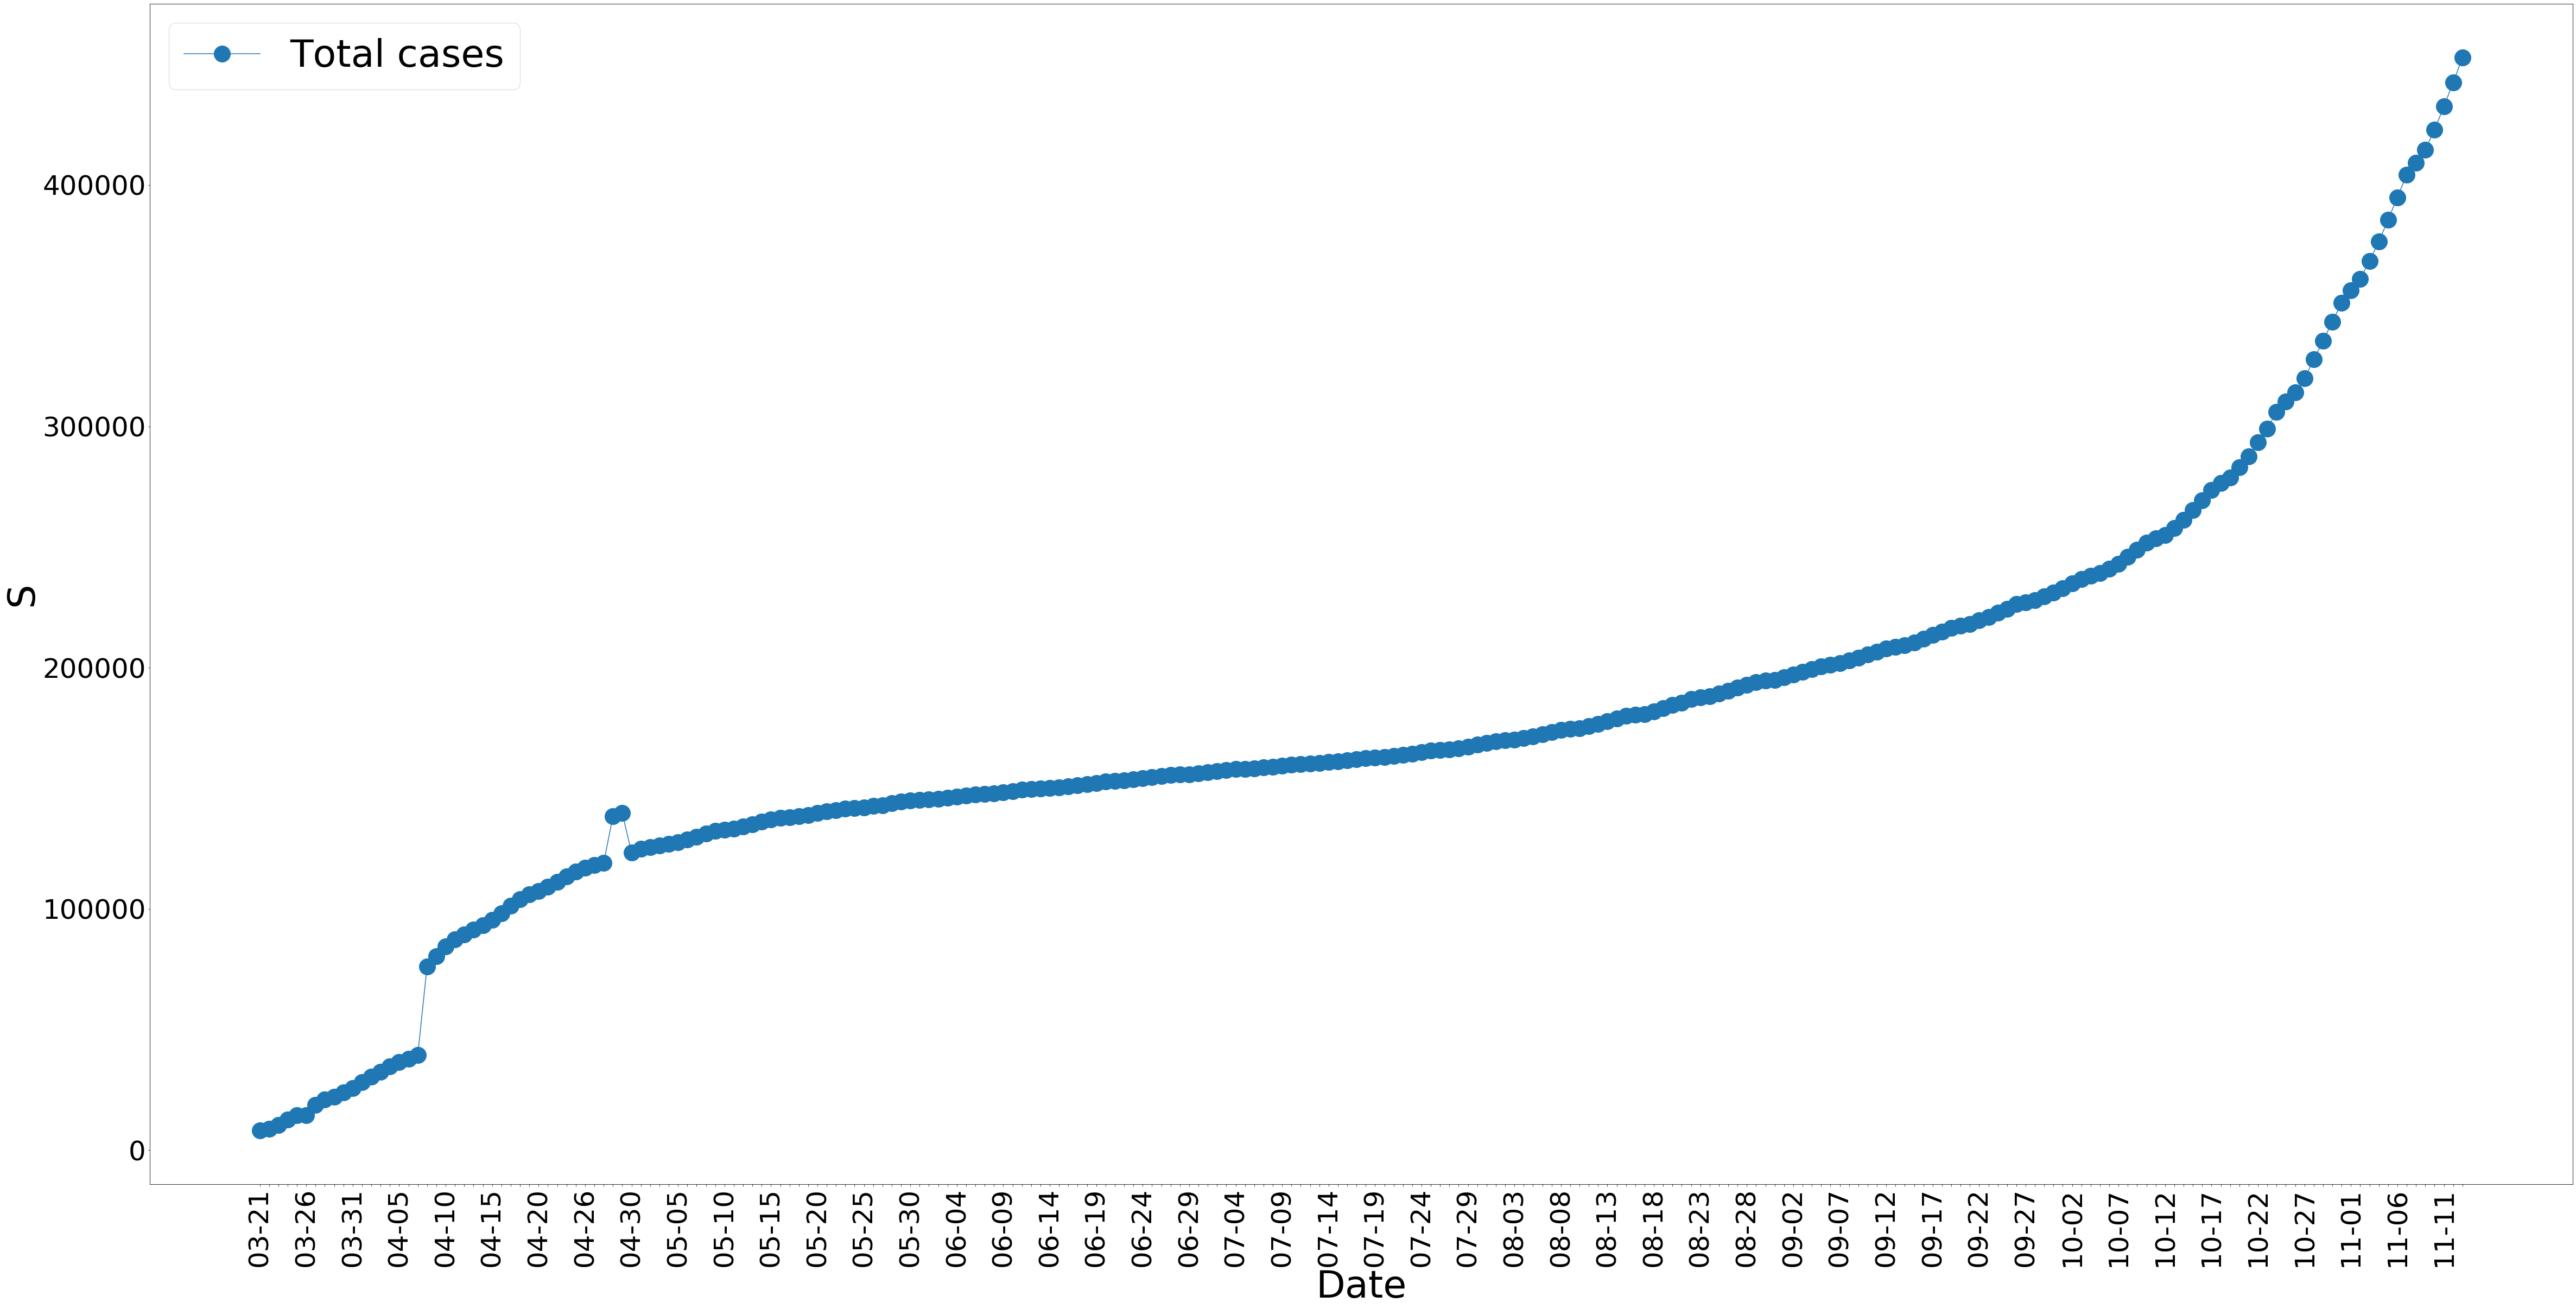

In [9]:
plt.figure(figsize=(80,40))
plt.plot(S,'-o',markersize=30,label='Total cases')
plt.xticks(np.arange(len(dates[:len(S)])), dates[:len(S)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('S',fontsize=70)
plt.xlabel('Date',fontsize=70)
plt.legend(loc=0,fontsize=70)

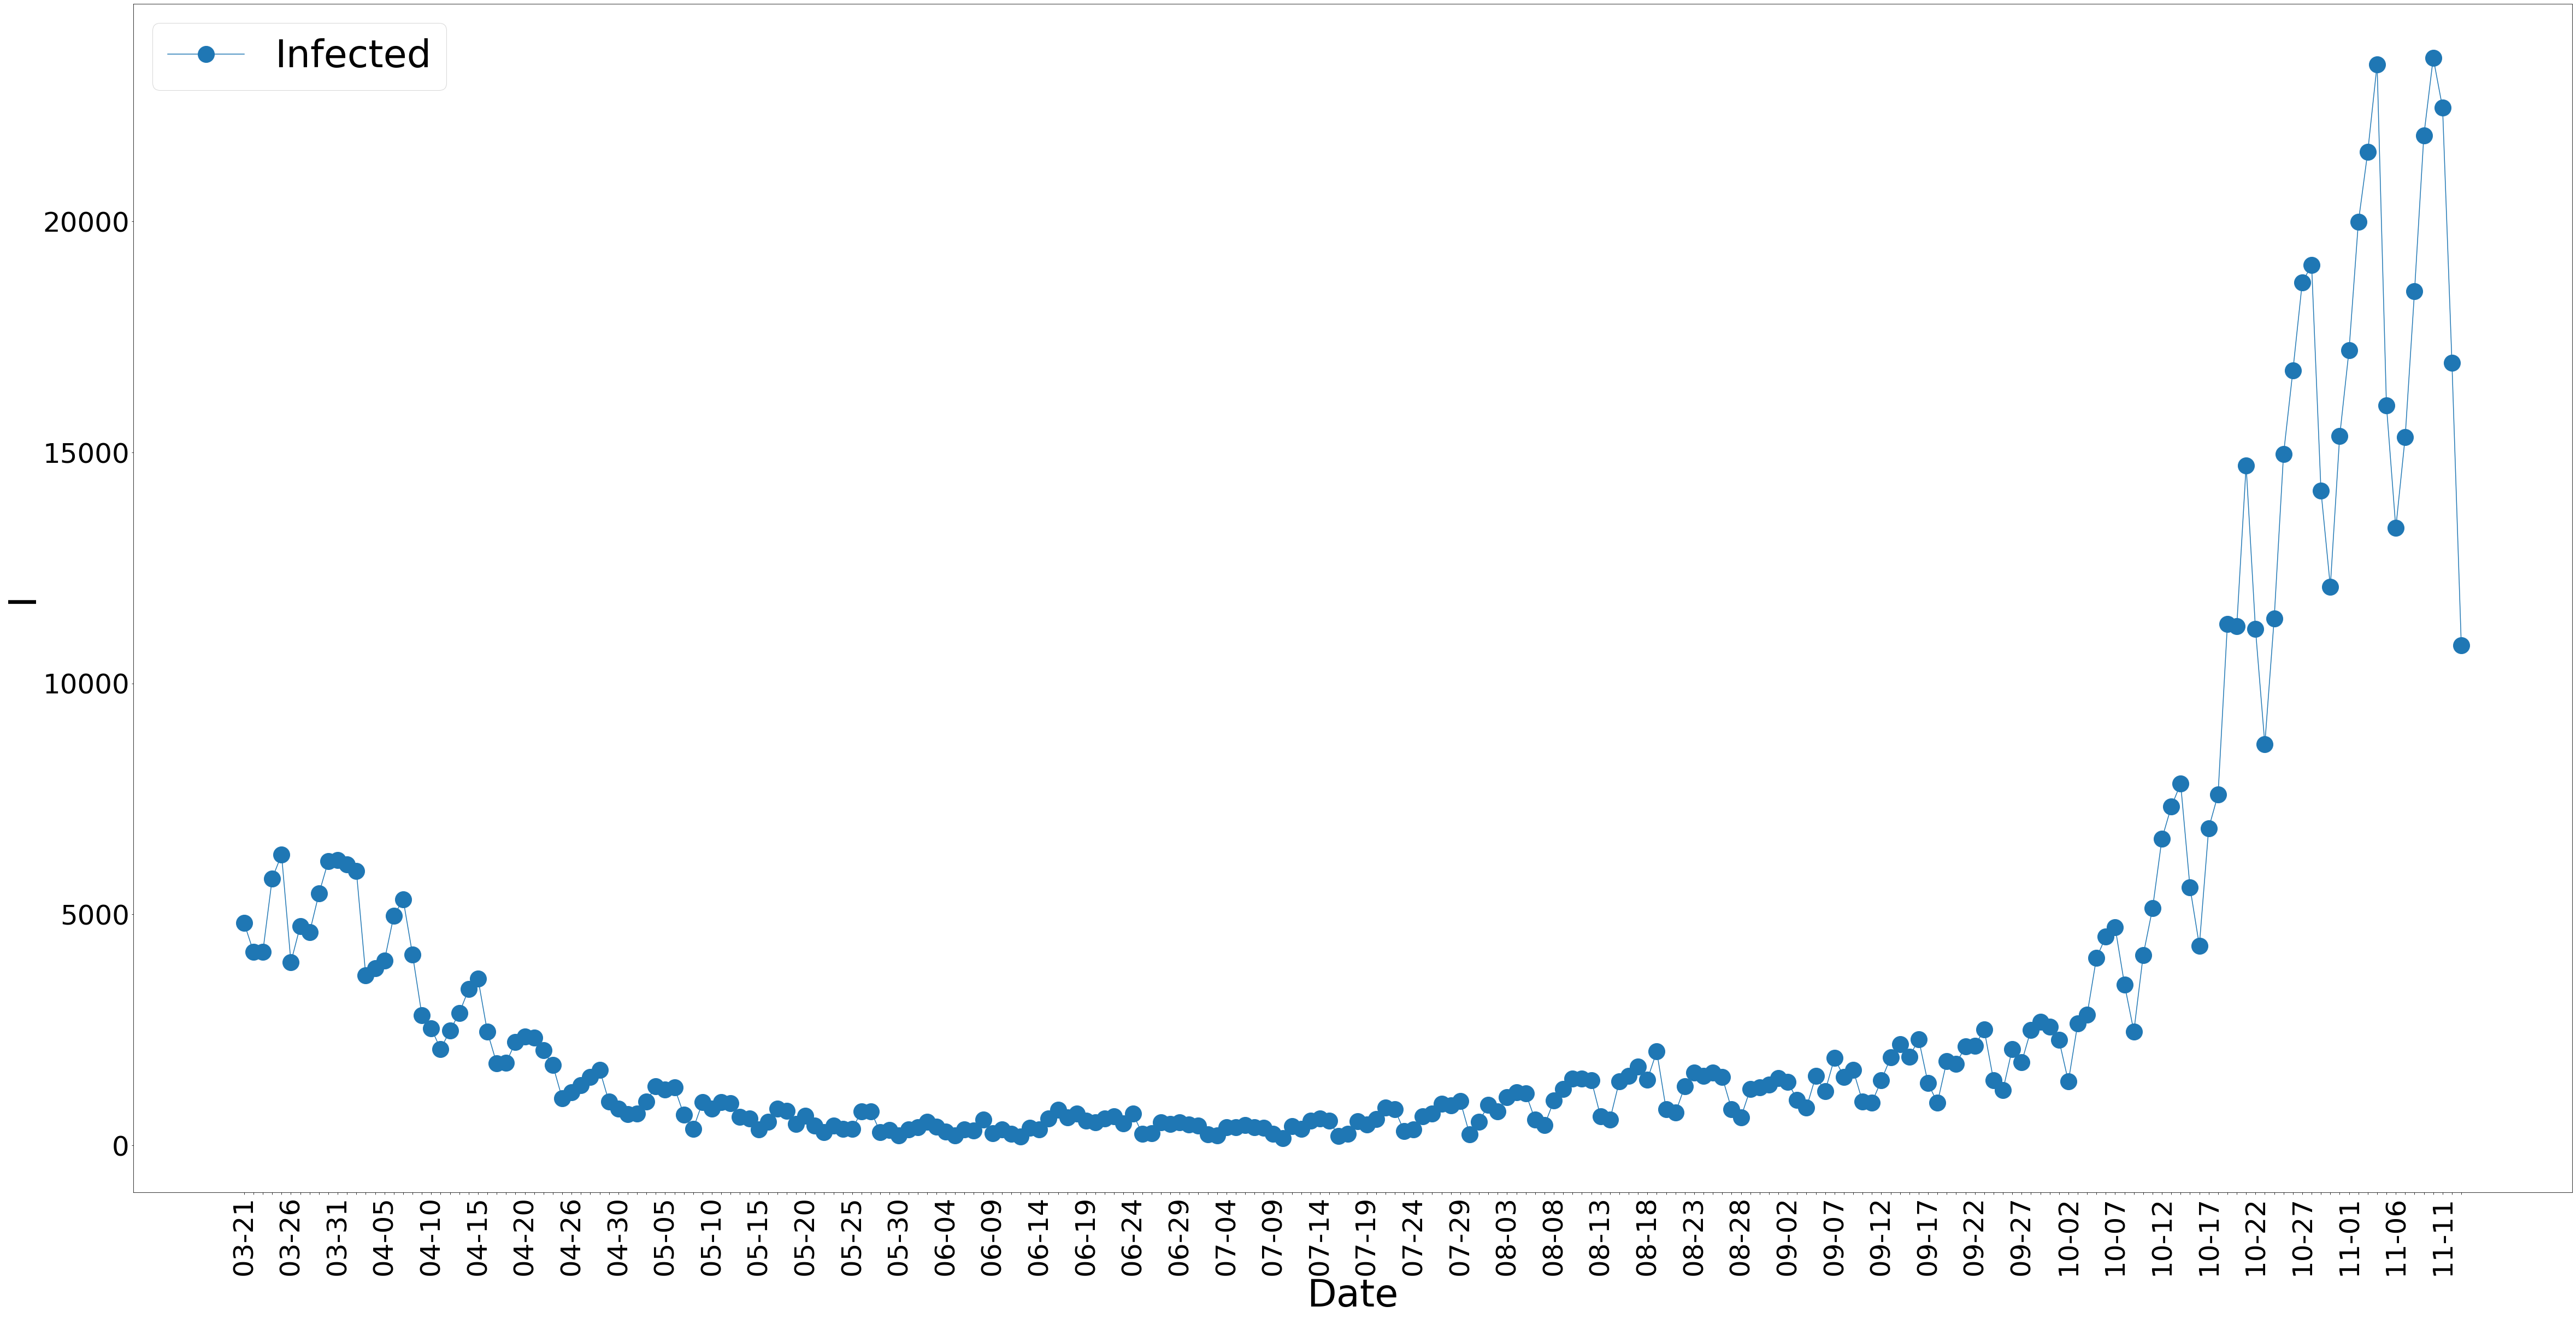

In [10]:
plt.figure(figsize=(80,40))
plt.plot(I,'-o',markersize=30,label='Infected')
plt.xticks(np.arange(len(dates[:len(I)])), dates[:len(I)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('I',fontsize=70)
plt.xlabel('Date',fontsize=70)
plt.legend(loc=0,fontsize=70)

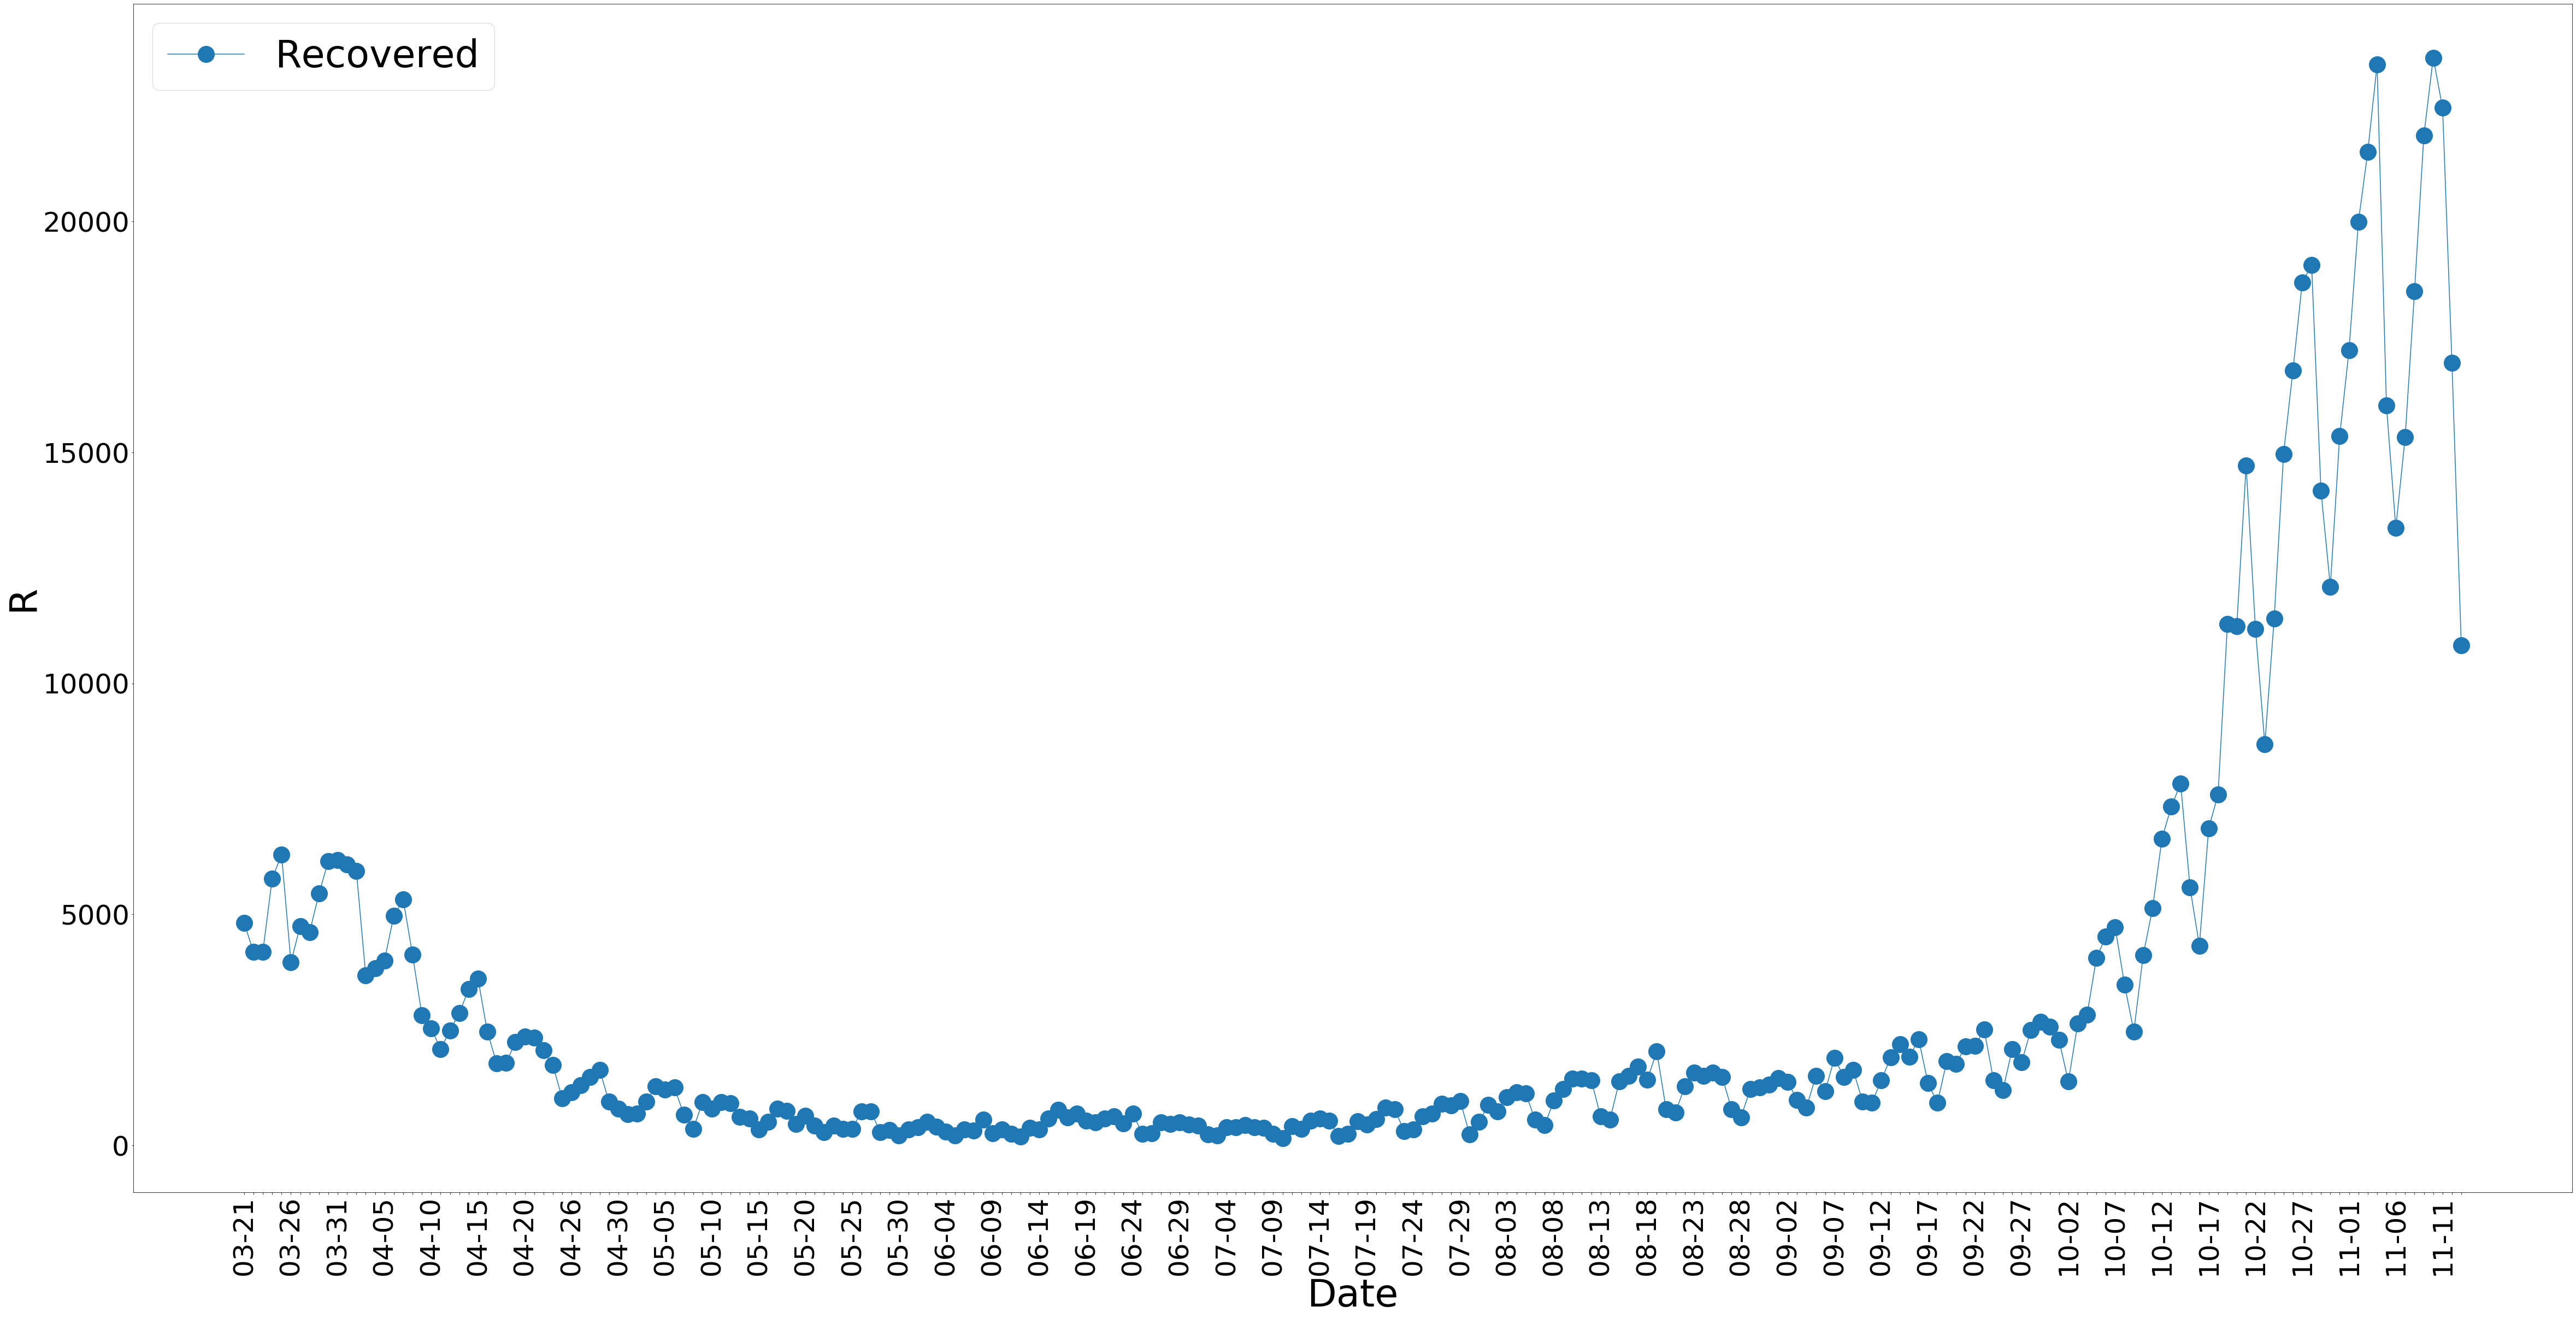

In [11]:
plt.figure(figsize=(80,40))
plt.plot(I,'-o',markersize=30,label='Recovered')
plt.xticks(np.arange(len(dates[:len(R)])), dates[:len(R)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('R',fontsize=70)
plt.xlabel('Date',fontsize=70)
plt.legend(loc=0,fontsize=70)

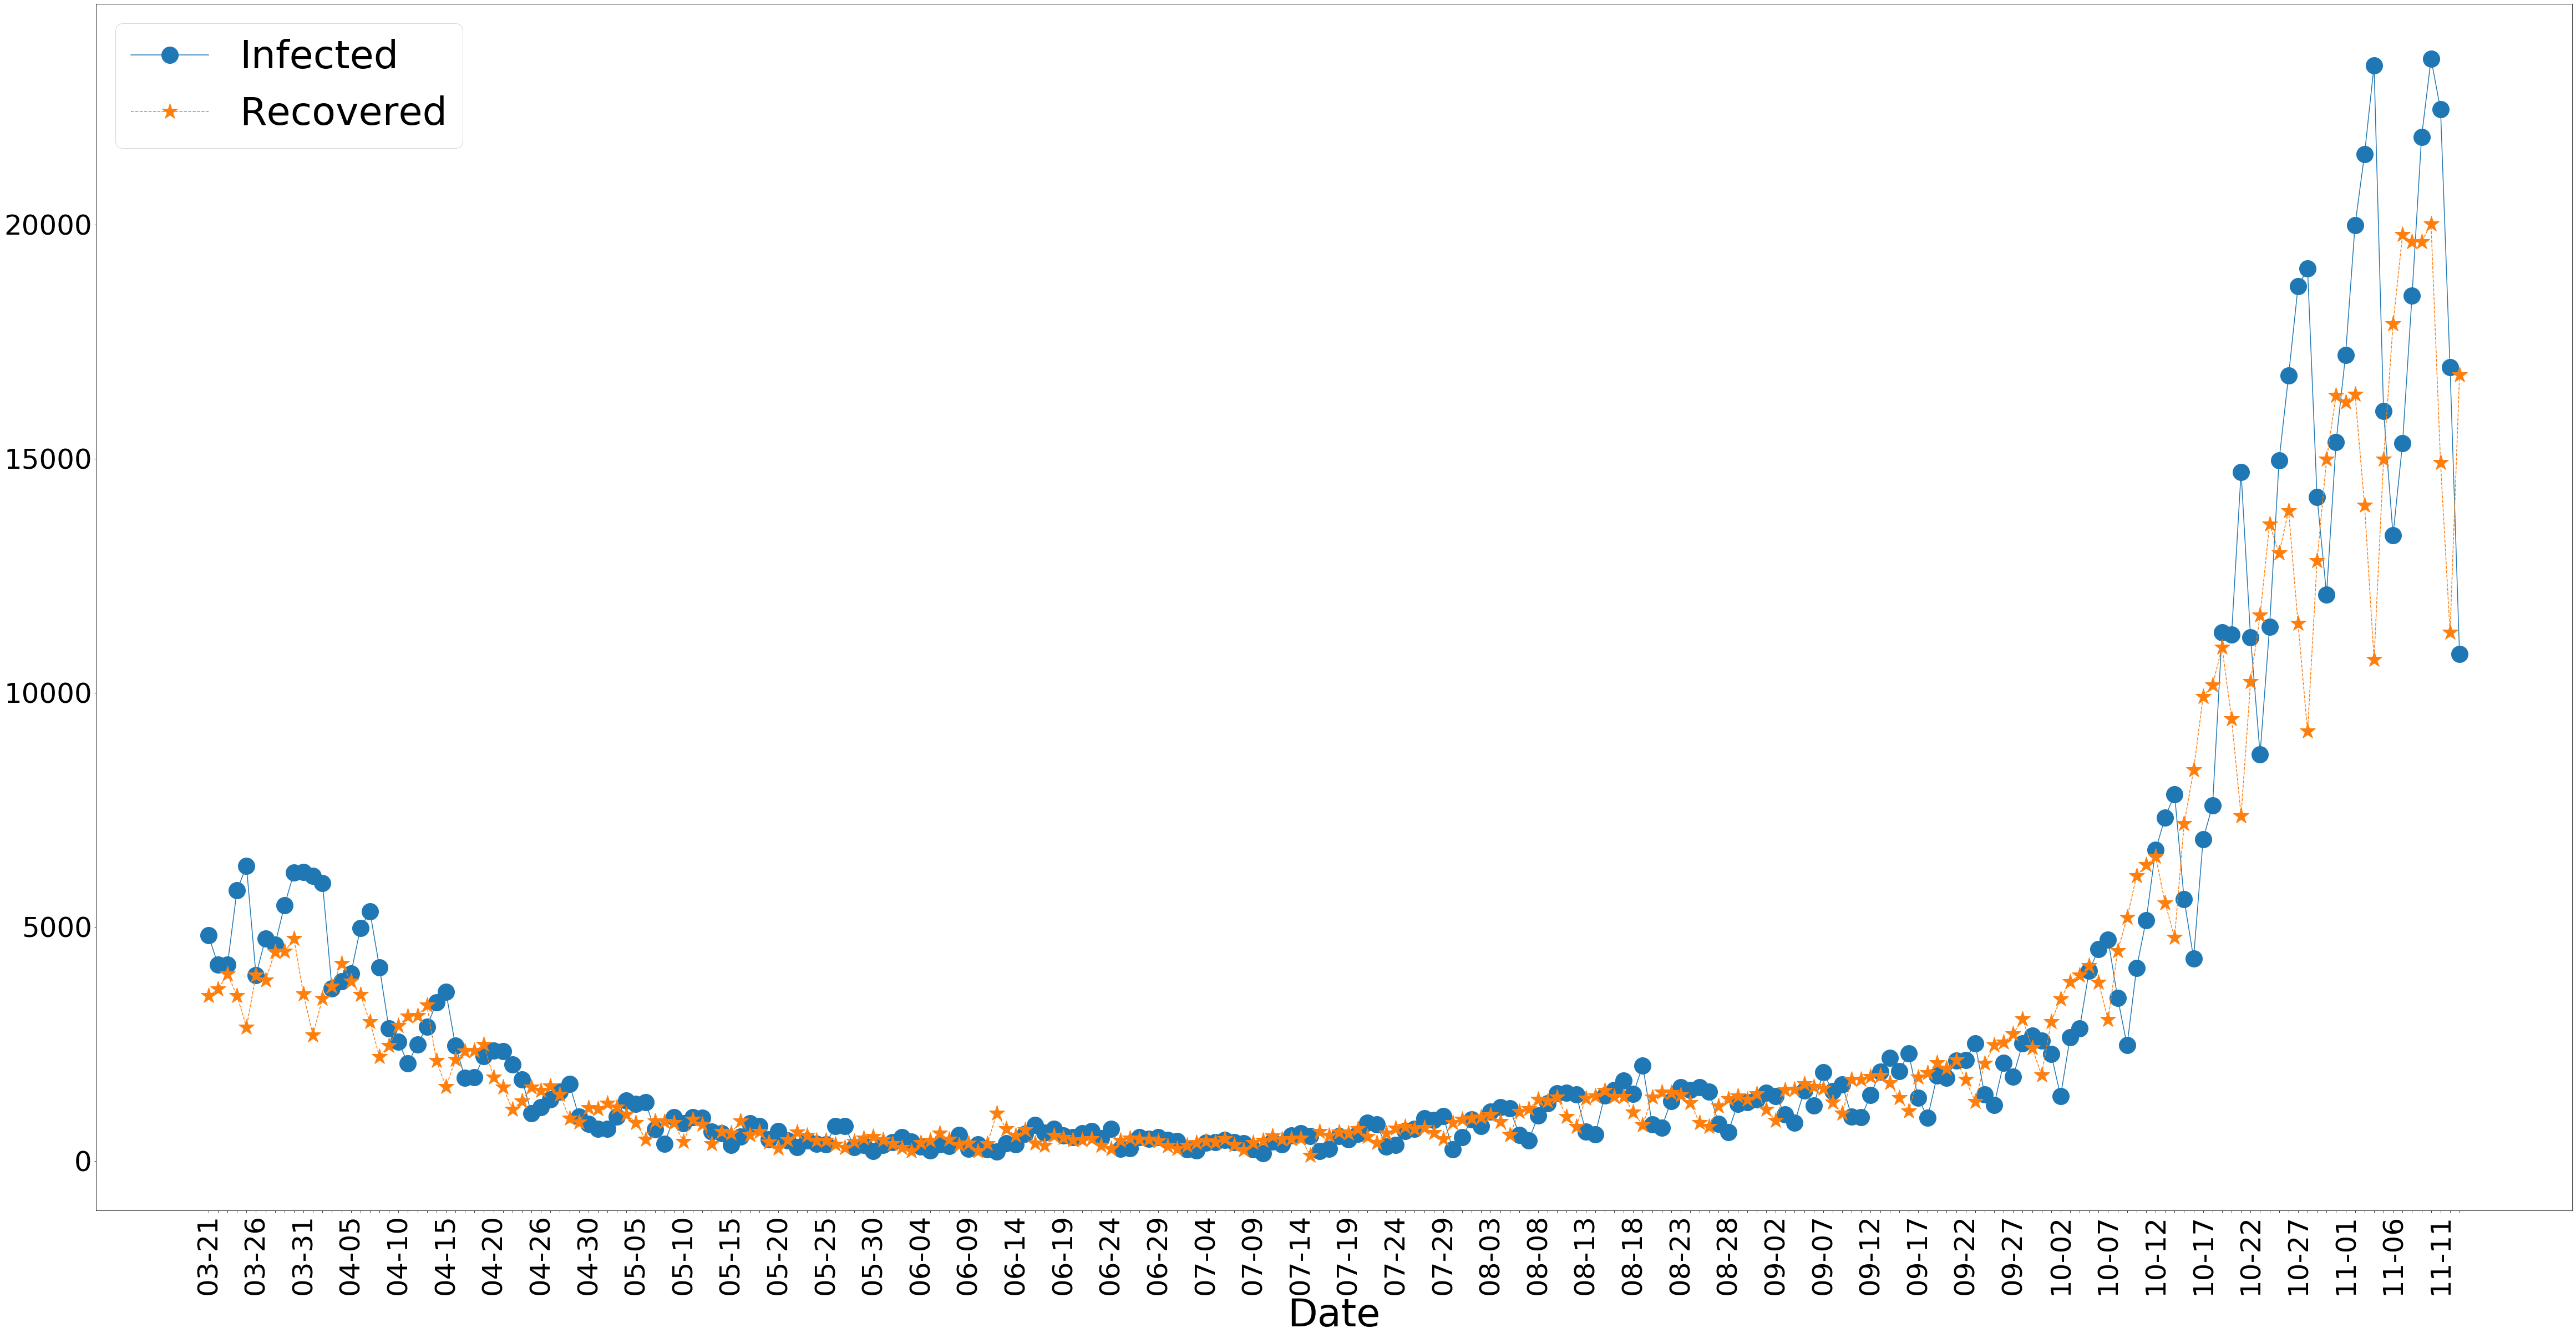

In [12]:
plt.figure(figsize=(80,40))
plt.plot(I,'-o',markersize=30,label='Infected')
plt.plot(R,'--*',markersize=30,label='Recovered')
plt.xticks(np.arange(len(dates[:len(R)])), dates[:len(R)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Date',fontsize=70)
plt.legend(loc=0,fontsize=70)

In [13]:
window_size=30
iterartion=len(S)-window_size


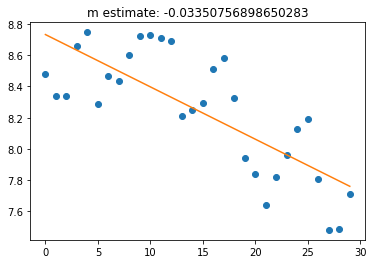

0.24481256461103487 0.13111818516355858 std_m


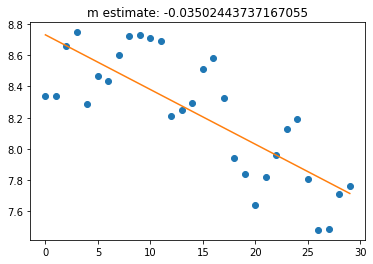

0.2399409185153338 0.14256131172390873 std_m


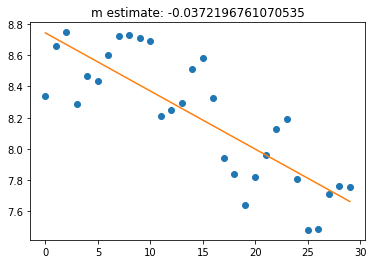

0.22824139940269092 0.14202420656787554 std_m


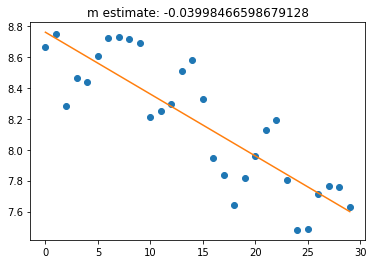

0.21434393743194585 0.14509703320570586 std_m


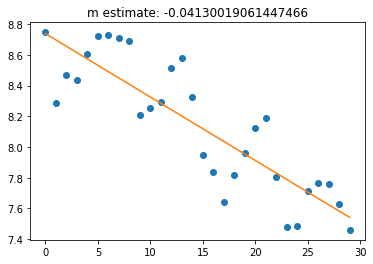

0.2140827874943308 0.14544878063645686 std_m


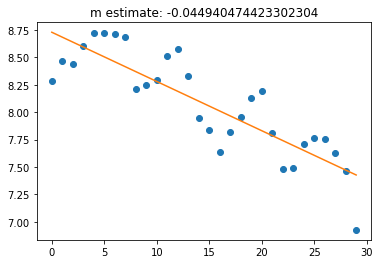

0.2354437977487114 0.14528929432176876 std_m


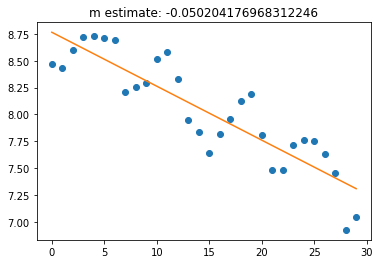

0.2249253984123553 0.14566985969026455 std_m


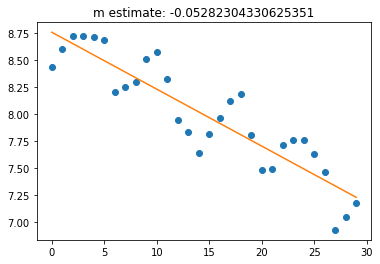

0.2174601692781589 0.14425309410126758 std_m


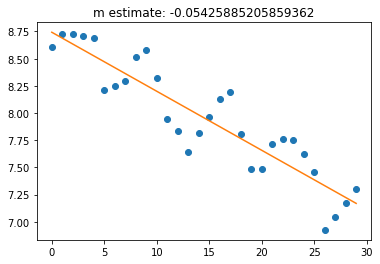

0.20960841701612595 0.145627724815501 std_m


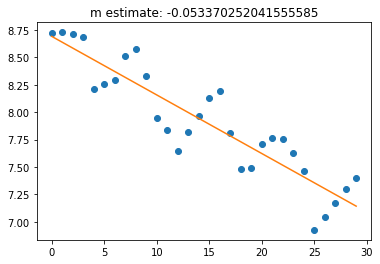

0.2139293218760949 0.1558617008642508 std_m


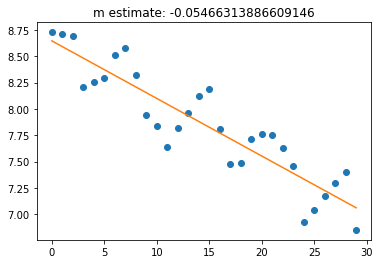

0.21772148885396345 0.15317171352111658 std_m


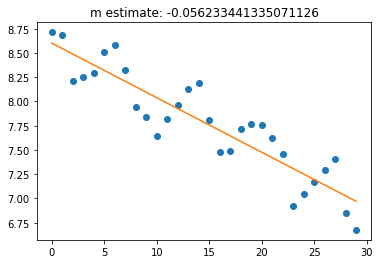

0.22461558347095592 0.1650569490775092 std_m


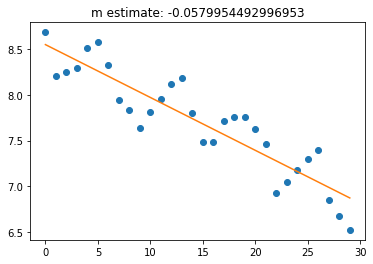

0.2338114263185374 0.1626315159591187 std_m


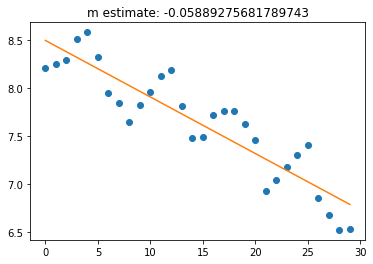

0.23767101707517824 0.16573900042303888 std_m


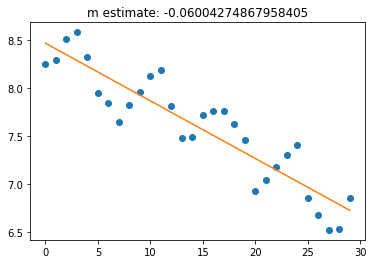

0.23244839315985807 0.1642529600760905 std_m


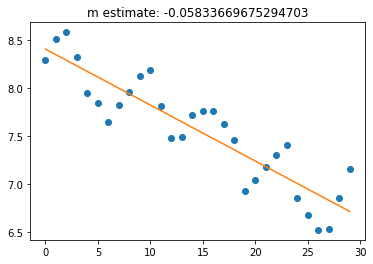

0.24462504195026447 0.16529826970769831 std_m


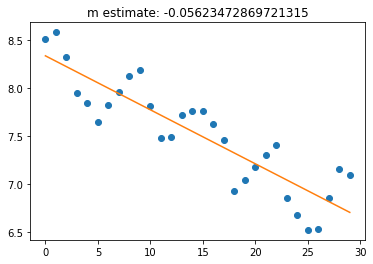

0.2555666693555319 0.1663291614219618 std_m


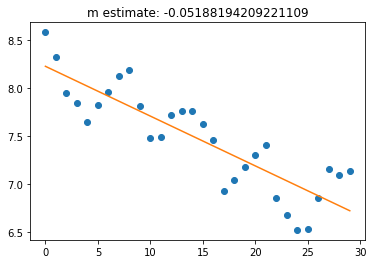

0.2656384709683126 0.17238463657020875 std_m


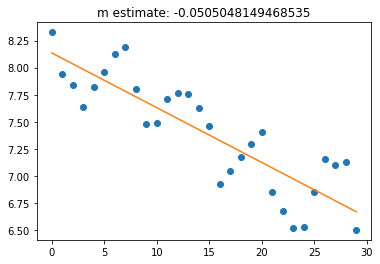

0.25853708700553824 0.18244091654300873 std_m


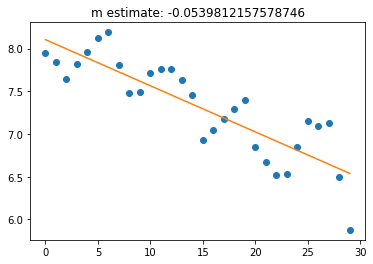

0.2866193910102441 0.1818424281630697 std_m


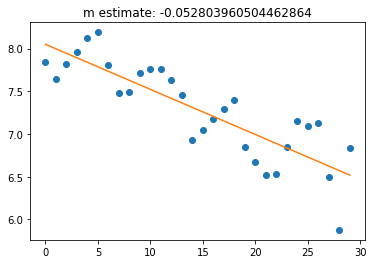

0.29165582624251946 0.17899547799051435 std_m


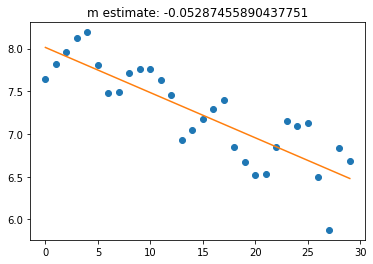

0.29139666222473 0.19103947982418412 std_m


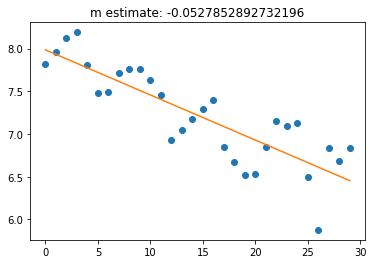

0.2919944668705638 0.2236487031083051 std_m


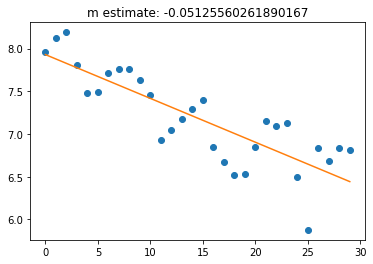

0.29921710081508307 0.2229482294516616 std_m


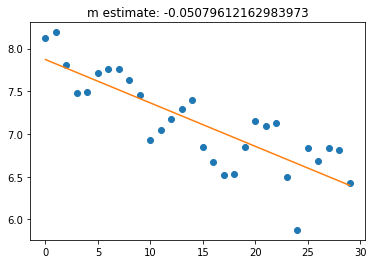

0.299216421039158 0.22529446365363096 std_m


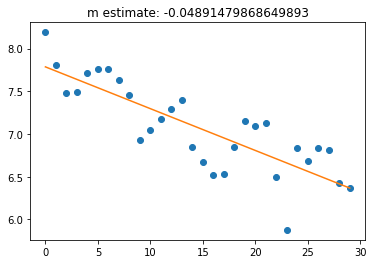

0.29507751373870356 0.23840668019780753 std_m


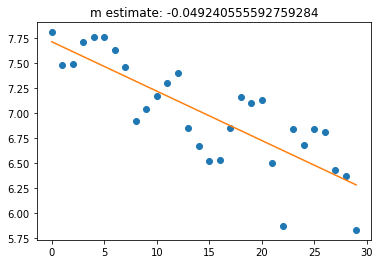

0.29750471920552385 0.23606192713944701 std_m


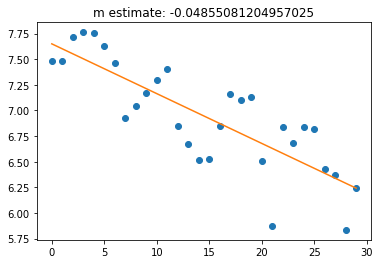

0.2969254413804058 0.27692390447072746 std_m


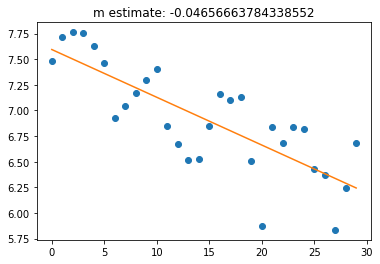

0.30719518919667405 0.29512014394524777 std_m


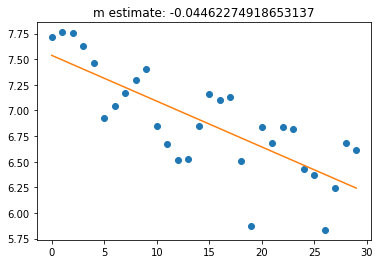

0.3149054662823989 0.29526966549993416 std_m


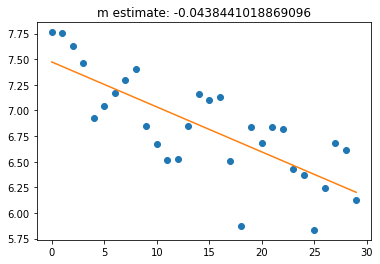

0.31332905397793726 0.29481748335124663 std_m


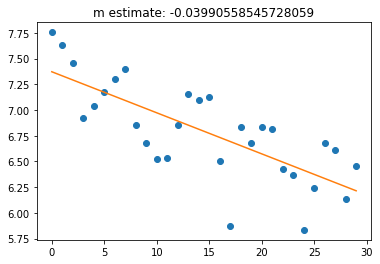

0.31180489448289445 0.2989441855505324 std_m


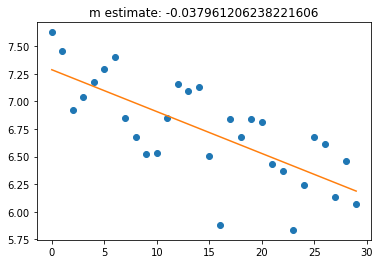

0.3035590812129421 0.3021384962129322 std_m


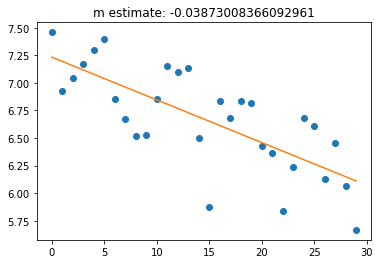

0.30864761831257104 0.31093759801838833 std_m


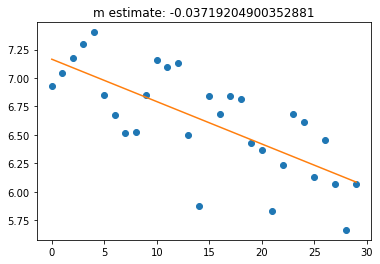

0.30548737059953457 0.31254053632012124 std_m


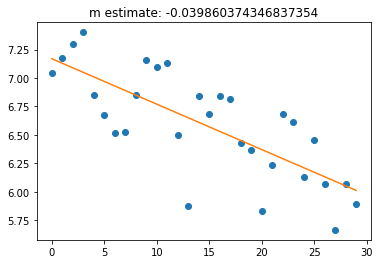

0.30281819252906594 0.3148758525665928 std_m


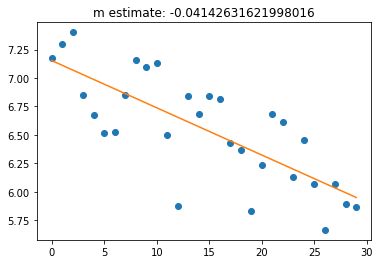

0.3022561540794594 0.31425621126786485 std_m


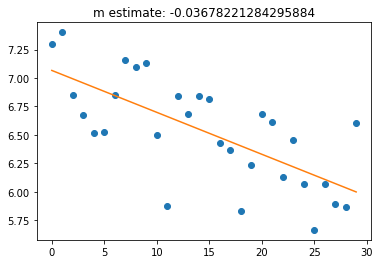

0.32474560000834235 0.31611631365480963 std_m


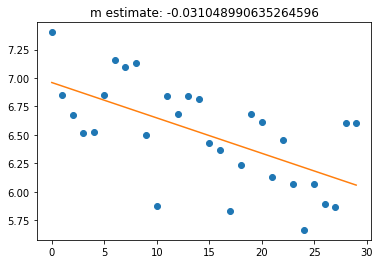

0.33868513294177915 0.3107985084573324 std_m


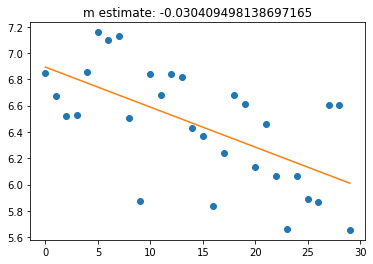

0.334777427077151 0.31284624148915385 std_m


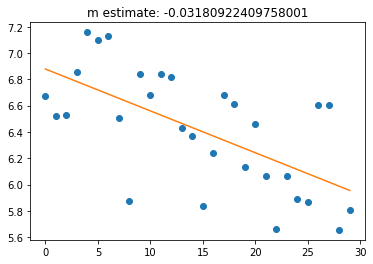

0.33592149823725287 0.3110813409808336 std_m


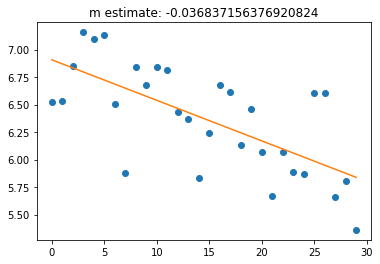

0.34640433153646144 0.31188114604868733 std_m


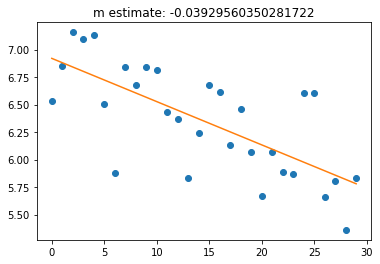

0.3382228658874835 0.3170088006039117 std_m


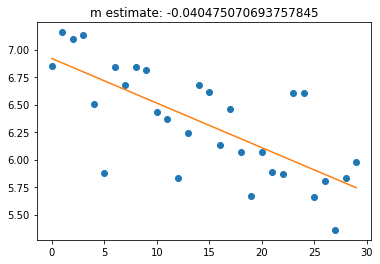

0.3325718478163085 0.31870919853881935 std_m


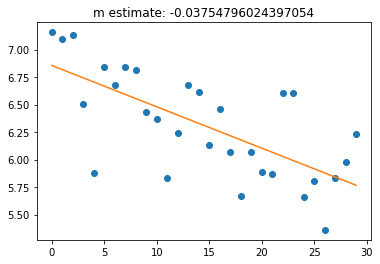

0.3443540267152021 0.3199576173302169 std_m


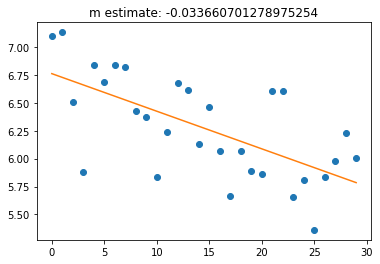

0.34206890542528745 0.3197624101194209 std_m


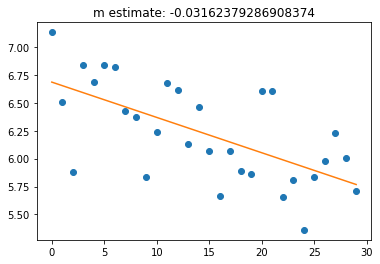

0.33589909024770964 0.32710898189898696 std_m


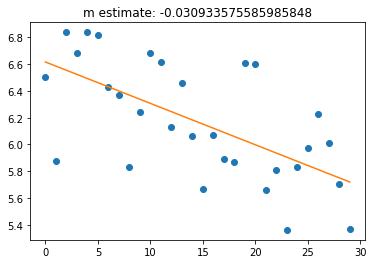

0.3316264068671099 0.3229512811825919 std_m


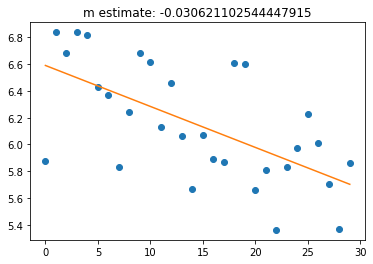

0.3322809830116824 0.34903242915353166 std_m


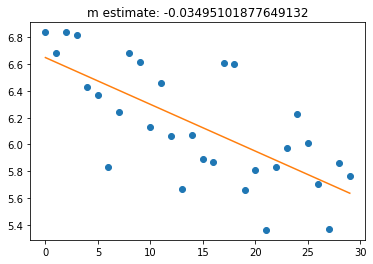

0.3027241539277381 0.3558854118105033 std_m


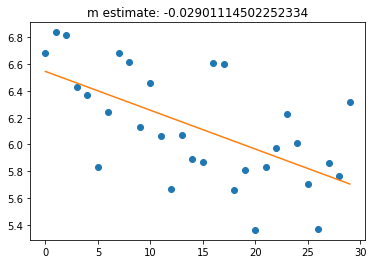

0.3235660343420992 0.35341529207634614 std_m


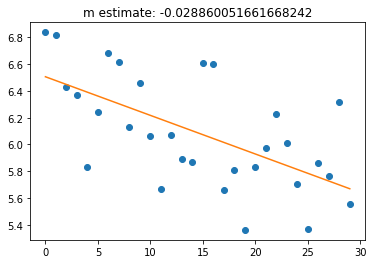

0.32326144164982556 0.3361103819605414 std_m


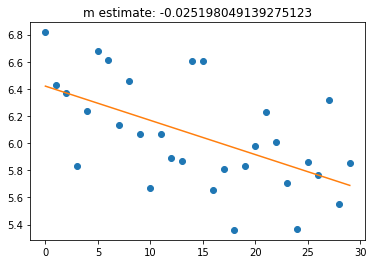

0.3182628002561505 0.35644608322832566 std_m


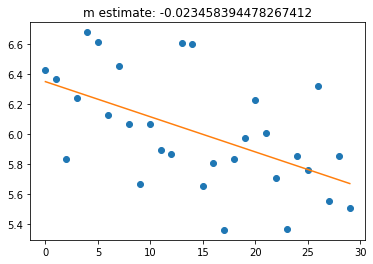

0.310279762238814 0.35815112381818426 std_m


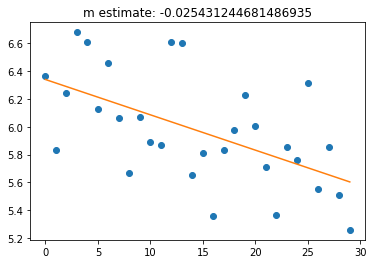

0.31717178050779915 0.6002569095829935 std_m


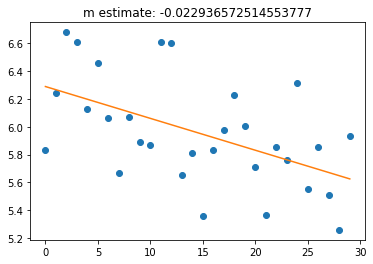

0.3228605071222393 0.6862288395439313 std_m


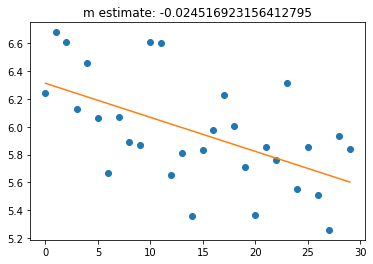

0.313929505796067 0.6746536424125007 std_m


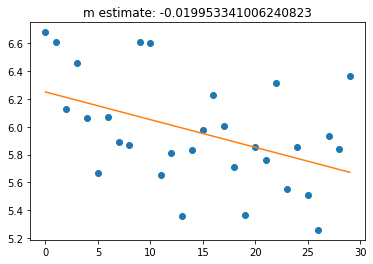

0.34139923597484056 0.6701793036094337 std_m


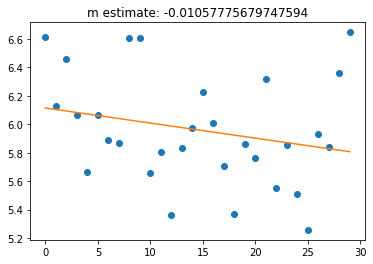

0.3693024330616906 0.6759607062642474 std_m


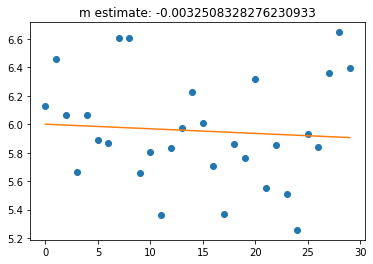

0.3689375824866913 0.6738862211863079 std_m


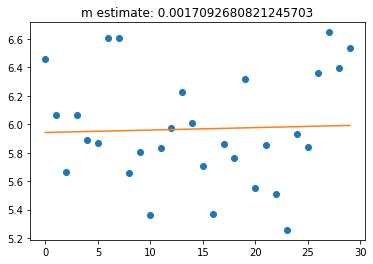

0.38291565552151396 0.6747191932006654 std_m


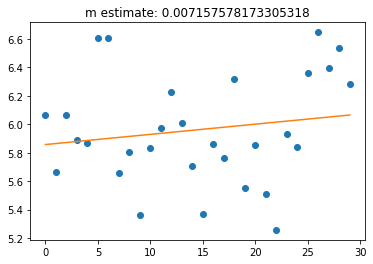

0.37190809071087444 0.6731281216938887 std_m


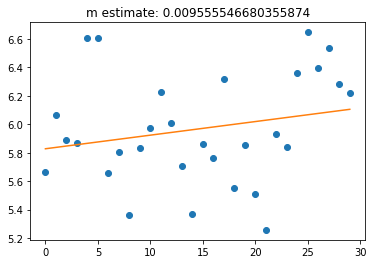

0.37035565271625603 0.66917232572449 std_m


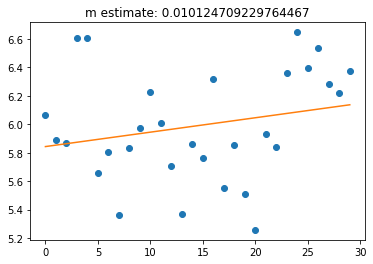

0.37193876524104125 0.6675299485085262 std_m


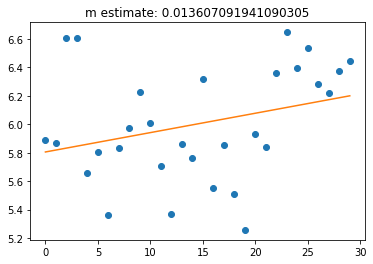

0.3724368485450278 0.6660923118572205 std_m


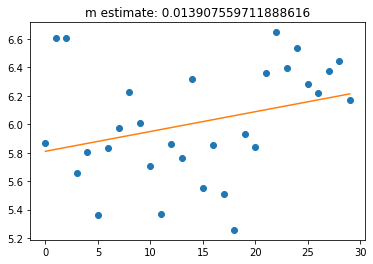

0.372161044816664 0.6673345259294241 std_m


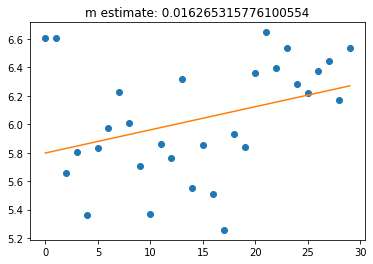

0.37552001204956365 0.66636395367003 std_m


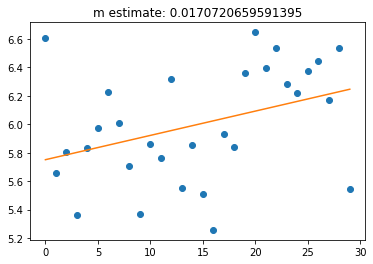

0.36703950716586003 0.6676523141865763 std_m


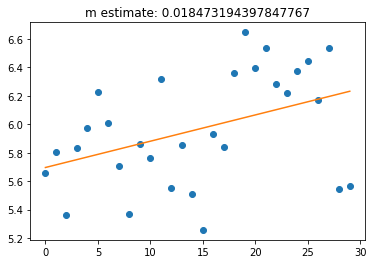

0.3517668437048639 0.6675152672253523 std_m


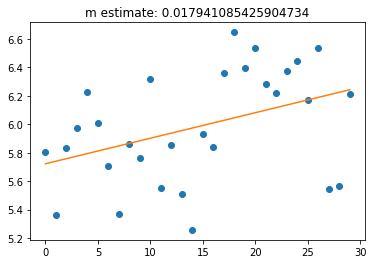

0.3517351337975406 0.666023572752003 std_m


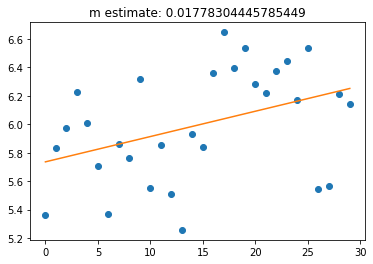

0.3519592685123821 0.6657333590487808 std_m


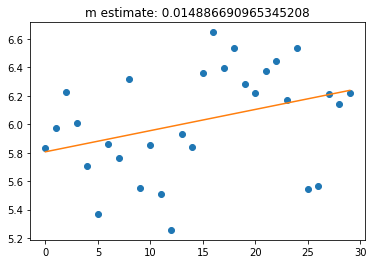

0.34428744830766983 0.6621713580943964 std_m


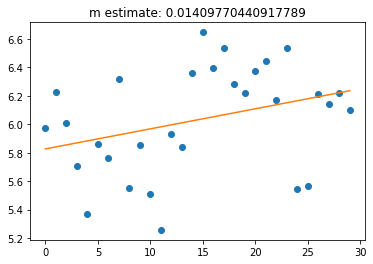

0.3452547110073651 0.661997264224326 std_m


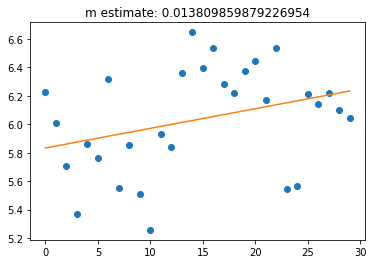

0.34598254991487243 0.6611358391803331 std_m


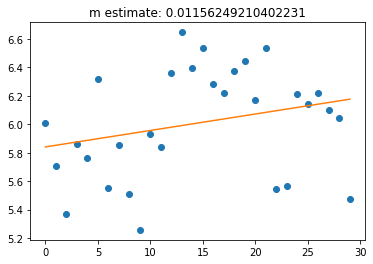

0.3638914604769168 0.6614169799734209 std_m


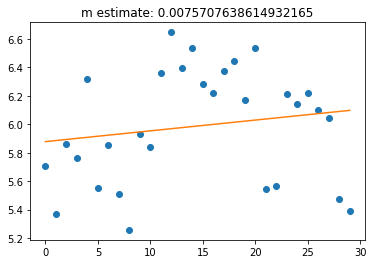

0.38793580798289884 0.6578863737946556 std_m


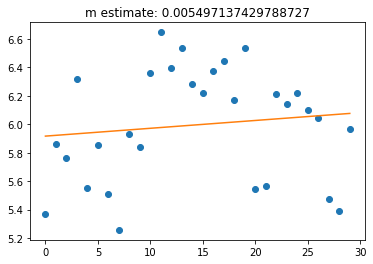

0.3870937077835058 0.6580765842822468 std_m


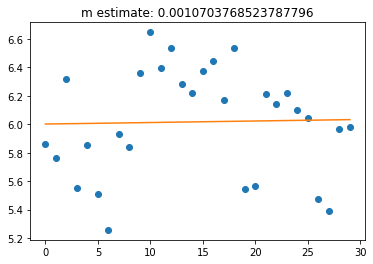

0.37196365914565155 0.6449948520685668 std_m


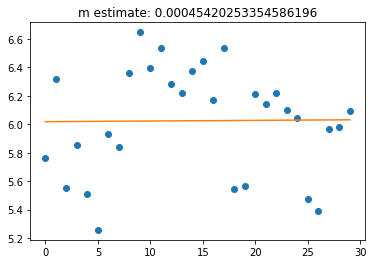

0.3710918162708939 0.6419545629734513 std_m


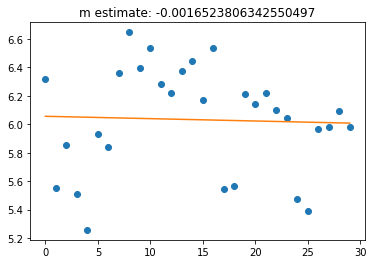

0.3677481219152386 0.6406771063502621 std_m


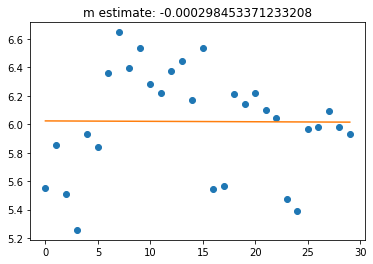

0.36447140601994166 0.6426619115694274 std_m


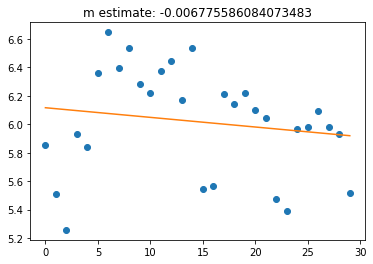

0.3615045948995414 0.6337436270693549 std_m


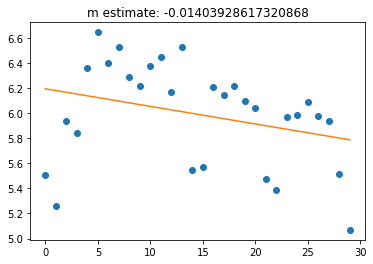

0.3844155395524259 0.6299904965419773 std_m


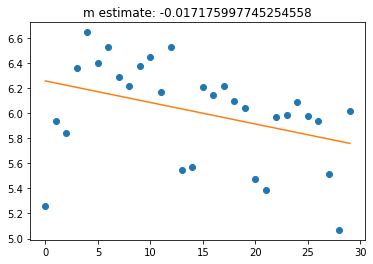

0.36390194330180303 0.4070184172633202 std_m


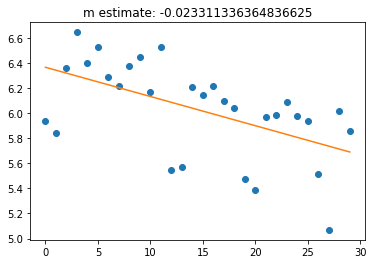

0.3087533915407656 0.25052332187652426 std_m


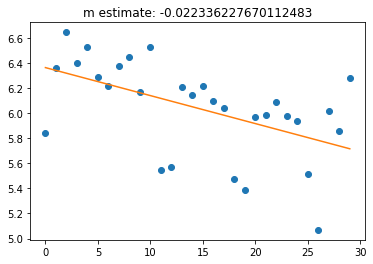

0.3167742640431515 0.23922638184427156 std_m


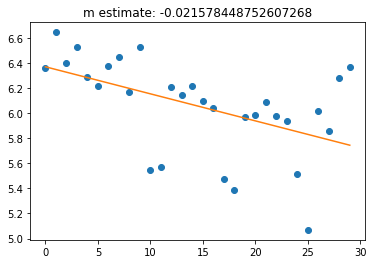

0.32376625810456283 0.23099855815512757 std_m


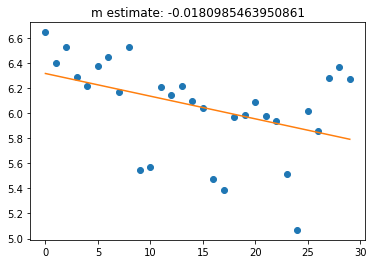

0.3369997375135231 0.24275310155453514 std_m


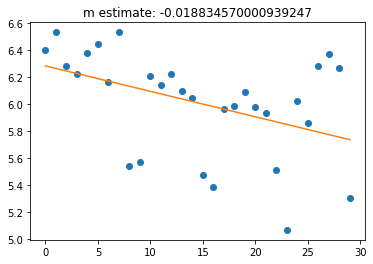

0.3412496055234871 0.29809404340655354 std_m


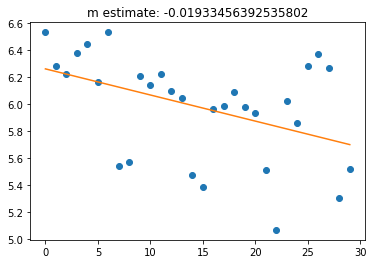

0.34237689647861097 0.30574133383054974 std_m


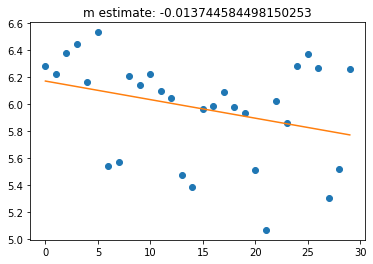

0.35129266378412793 0.3089522122834607 std_m


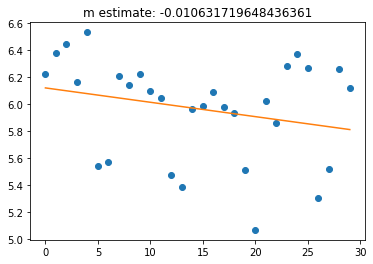

0.35564148020404224 0.30844741755472066 std_m


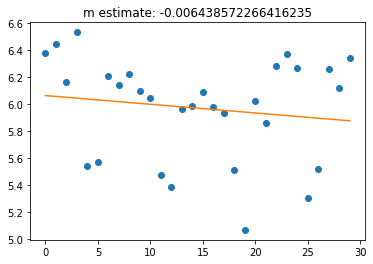

0.3666405126094941 0.3103662113418382 std_m


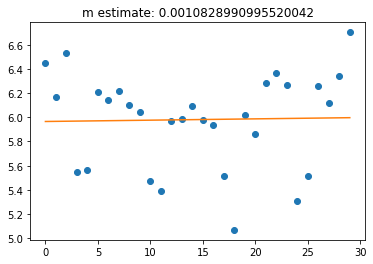

0.38700224901667946 0.3163903991203625 std_m


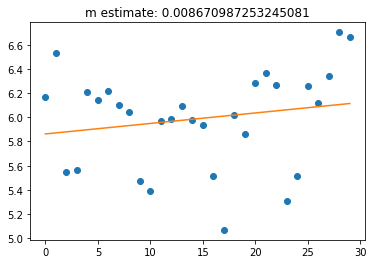

0.39034415046145116 0.31515760026071526 std_m


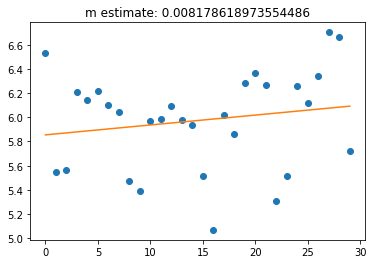

0.39254274178173465 0.31627982686780776 std_m


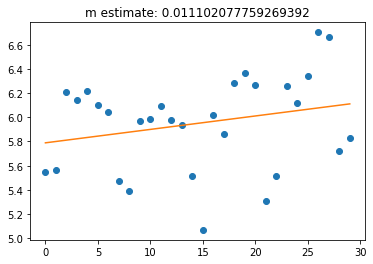

0.37362656783233783 0.3179050246068513 std_m


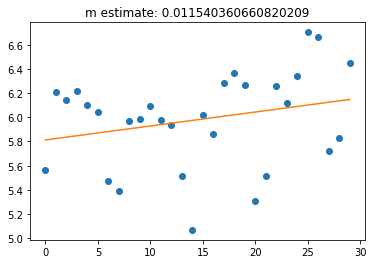

0.375279925542147 0.31752363107801135 std_m


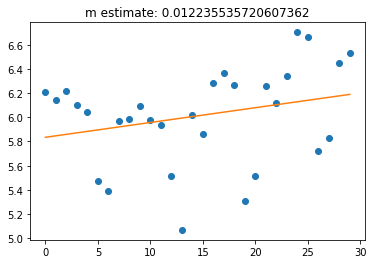

0.37805893663922086 0.31720590721015335 std_m


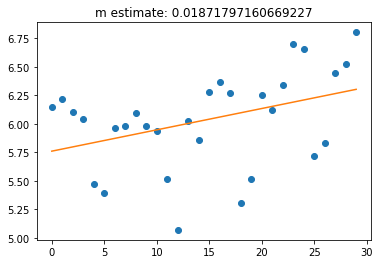

0.38357285018760634 0.31717803569393294 std_m


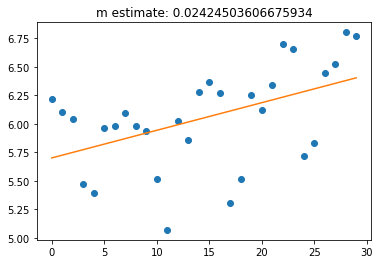

0.3828475445934179 0.3176684470531261 std_m


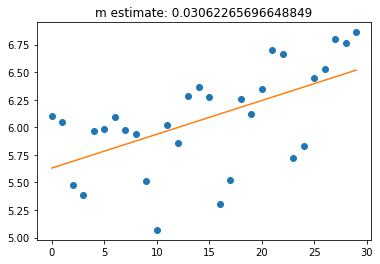

0.37520451100509833 0.3158902156942528 std_m


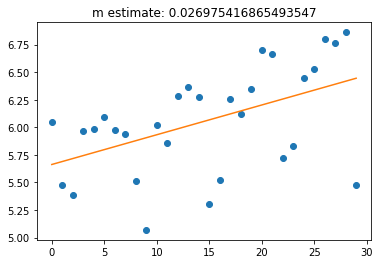

0.4096395028283146 0.3186159806063841 std_m


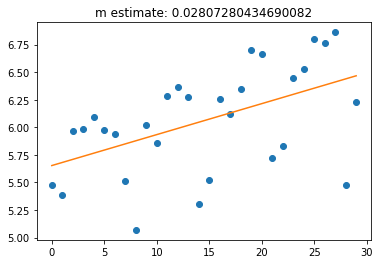

0.40534702149007823 0.3207051702513812 std_m


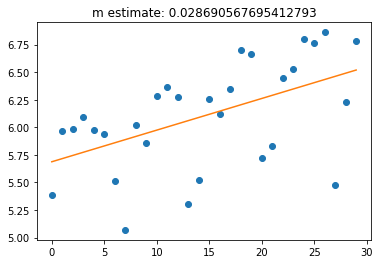

0.4070593539056129 0.31950222029194747 std_m


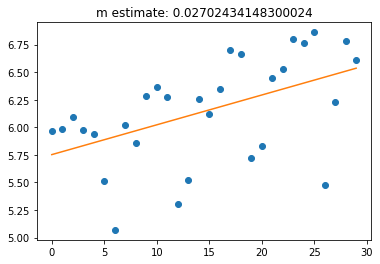

0.40312322140353557 0.31890422920587824 std_m


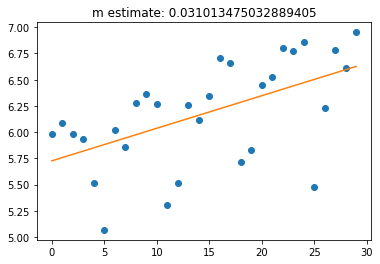

0.4059565172692116 0.3180730235686806 std_m


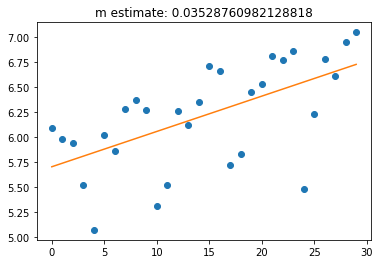

0.40769995346371707 0.3193208435216307 std_m


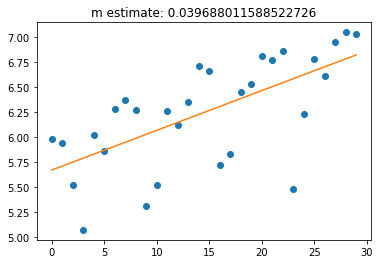

0.402462308406977 0.31791963604384427 std_m


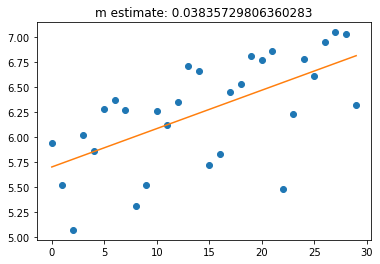

0.40926300160404755 0.31956436690404744 std_m


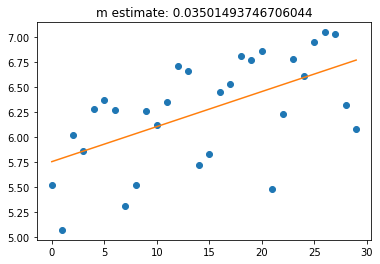

0.42835216431104395 0.3137716698877678 std_m


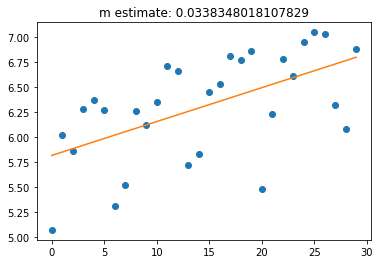

0.42609654261328417 0.3216114736270934 std_m


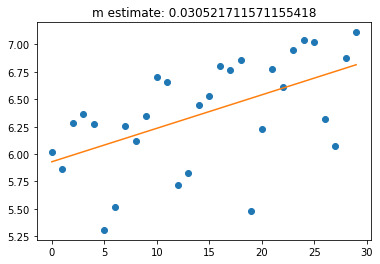

0.4046390864023912 0.3058894090150802 std_m


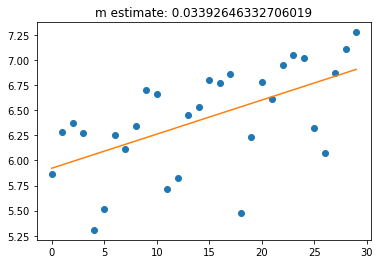

0.41064851444530004 0.30257289536698095 std_m


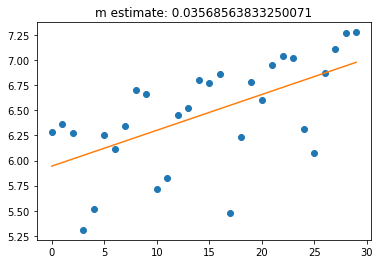

0.41462661240833926 0.3091861423268888 std_m


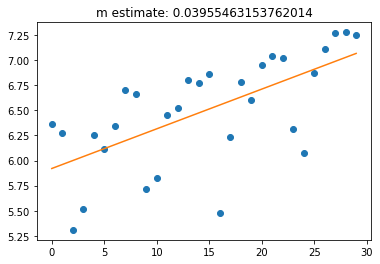

0.41101969466440774 0.3112559441292209 std_m


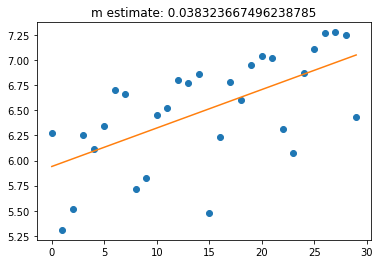

0.41915560775598154 0.2913631437729922 std_m


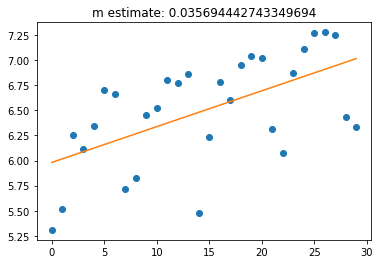

0.4353156648788451 0.23871999186896126 std_m


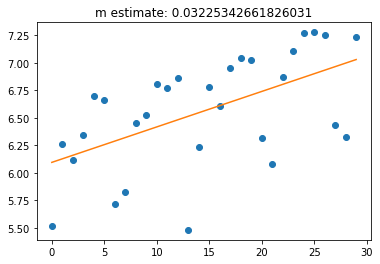

0.4169746208341846 0.21983437302256037 std_m


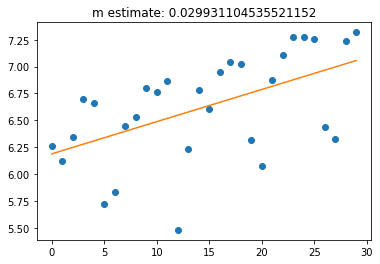

0.4046987599325581 0.21815531903721846 std_m


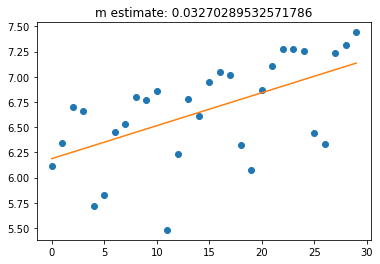

0.4088729875034944 0.21762720090509952 std_m


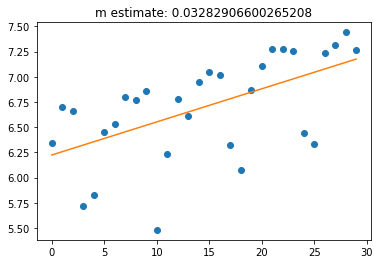

0.40899800003544984 0.22045415361471463 std_m


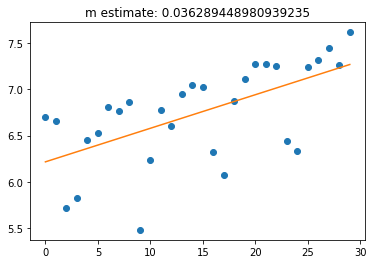

0.4139771907515684 0.21548357470991292 std_m


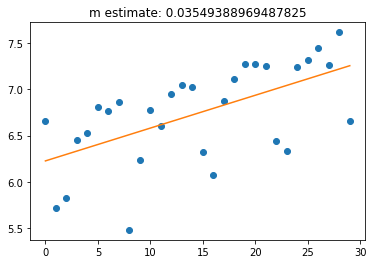

0.41930857510198755 0.21578988001682822 std_m


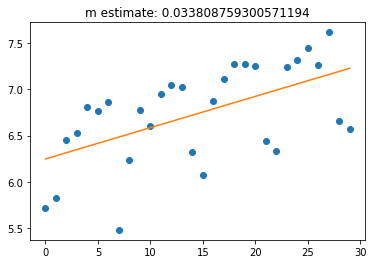

0.4305334617745113 0.21277800389974683 std_m


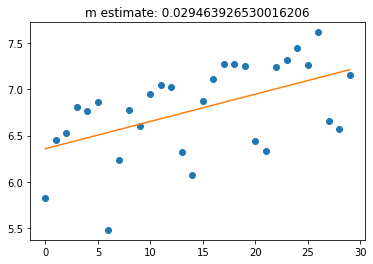

0.41816725540927935 0.20751386502645194 std_m


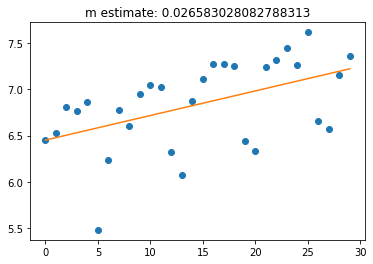

0.40606982032419076 0.20766748119542208 std_m


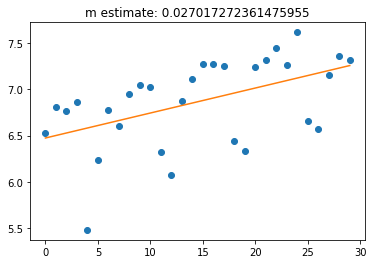

0.406239097352745 0.20841298833496003 std_m


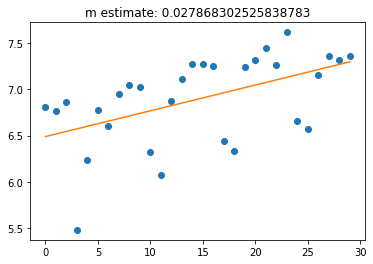

0.40628212932667884 0.21678315427481046 std_m


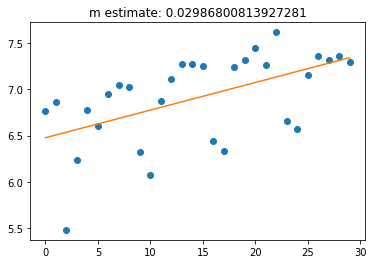

0.40168951430764893 0.21566569014187972 std_m


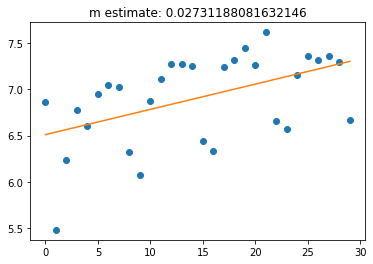

0.4166734063172202 0.21808272272321025 std_m


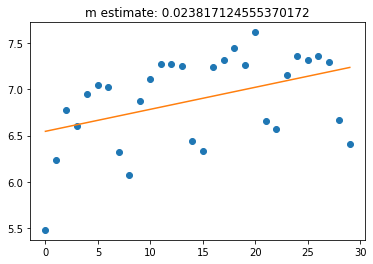

0.4413921774067107 0.21222208729647304 std_m


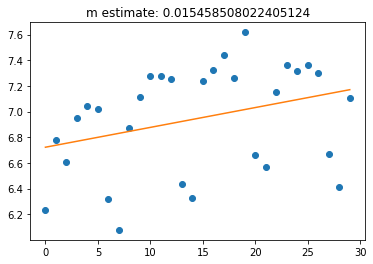

0.38937290467238395 0.2070257586275713 std_m


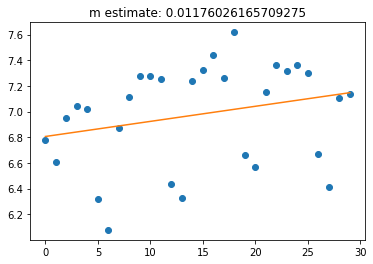

0.3774507240039545 0.2077614674342206 std_m


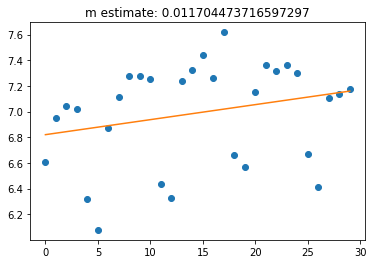

0.37743308474256015 0.20798702129732352 std_m


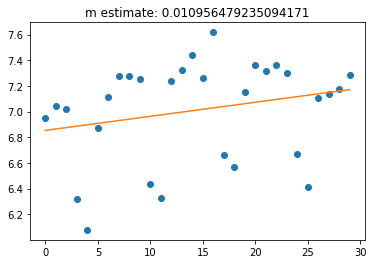

0.3757791210578293 0.21461228550735204 std_m


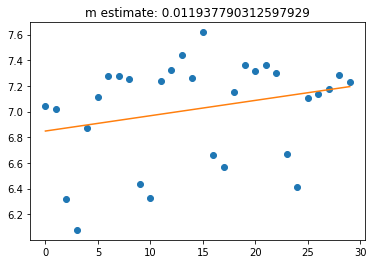

0.3753432630225696 0.21527294229720959 std_m


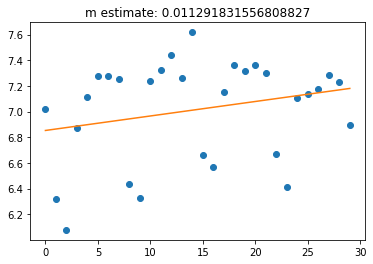

0.3774760126214856 0.2237662789633435 std_m


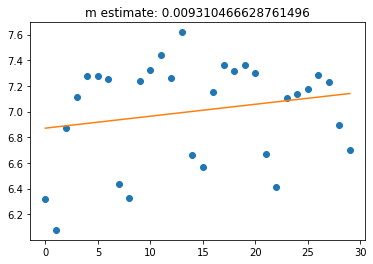

0.3856448272722852 0.21104985037990143 std_m


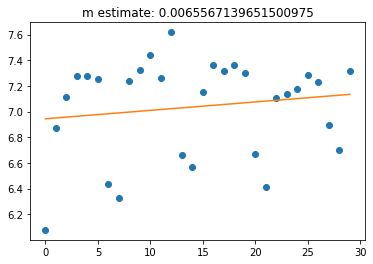

0.3719275761763691 0.21171100149199484 std_m


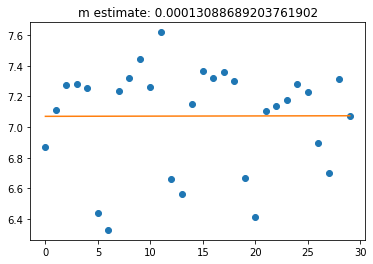

0.33121807390155794 0.19462291983513821 std_m


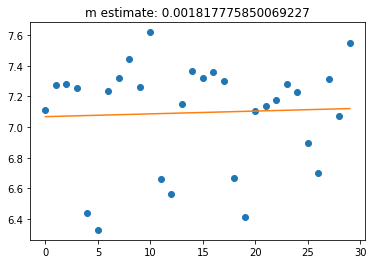

0.3392973631194589 0.19448981189829795 std_m


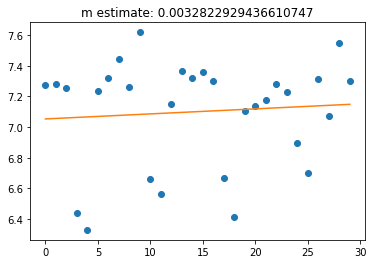

0.34052912170403055 0.19692118643625017 std_m


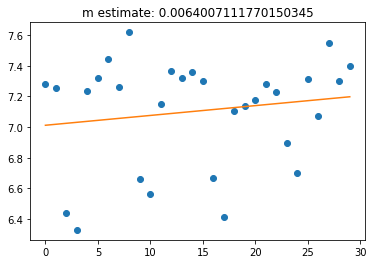

0.33996209747569994 0.19168220217209114 std_m


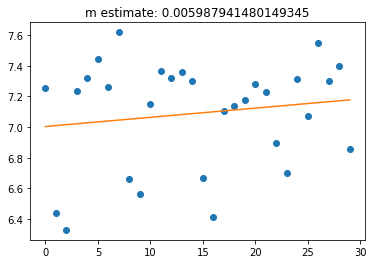

0.34180695039836606 0.20453098795263705 std_m


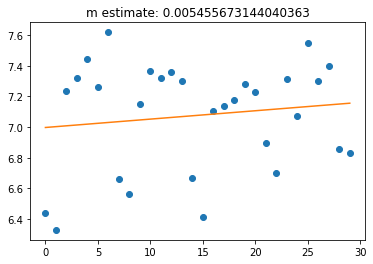

0.3441113601750647 0.1911065234596886 std_m


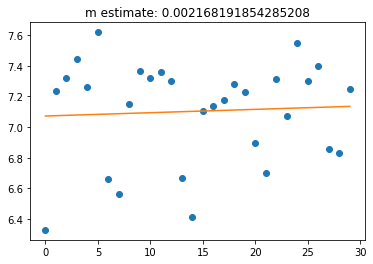

0.32705772373569547 0.19086993637837393 std_m


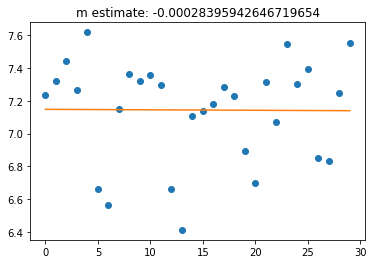

0.30391828342681004 0.18744328385897044 std_m


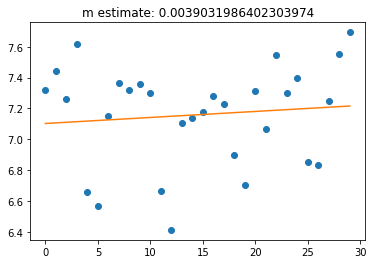

0.3174522991388501 0.187226501111265 std_m


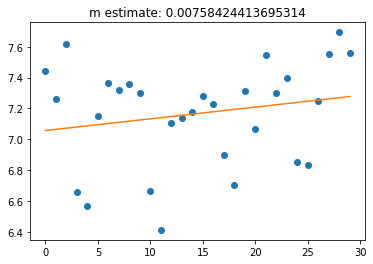

0.319352498991959 0.1894350264347616 std_m


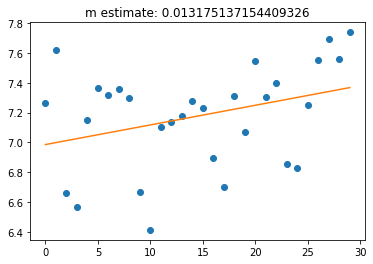

0.3187168843934186 0.187889872791926 std_m


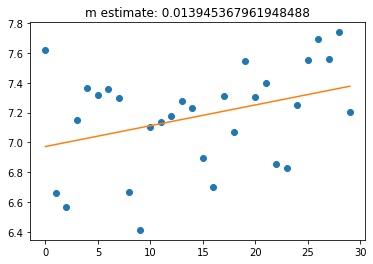

0.3158921575421553 0.19180468560102418 std_m


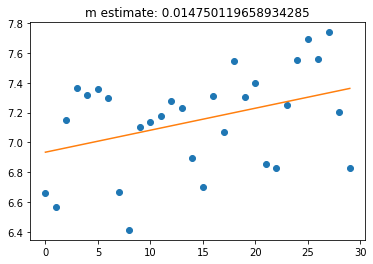

0.3080222489421851 0.18546085740701057 std_m


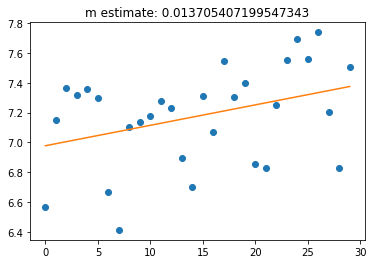

0.30445741399530696 0.1887850423766552 std_m


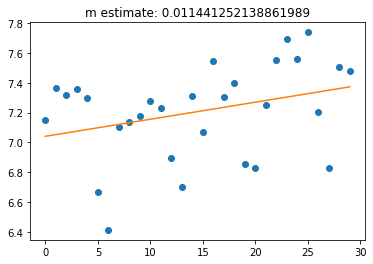

0.2943677583418081 0.18948976696213193 std_m


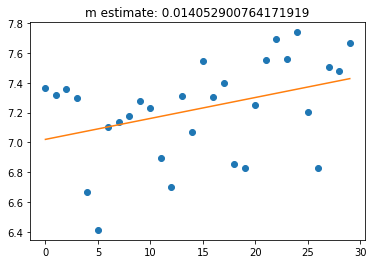

0.2973326994397892 0.1896950901738354 std_m


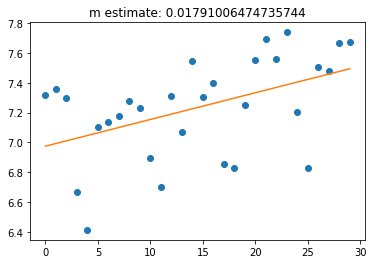

0.29185695657658745 0.19254191936263182 std_m


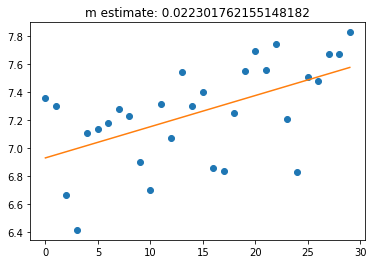

0.2882950565216795 0.1893011413662177 std_m


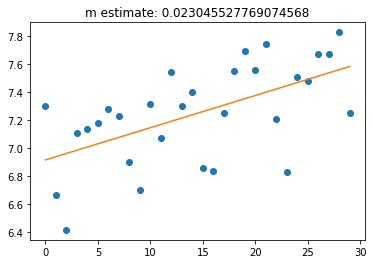

0.28317531574264754 0.19612133662004333 std_m


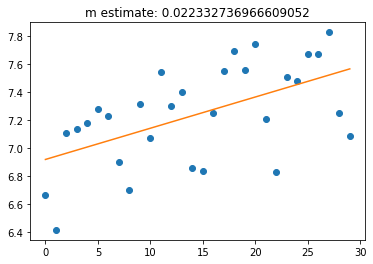

0.28875502615703014 0.195047561421509 std_m


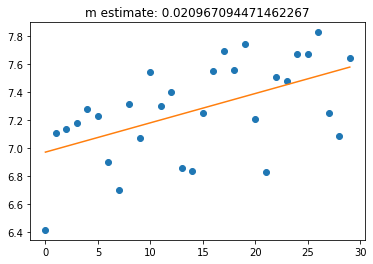

0.284839795100034 0.19292507073445786 std_m


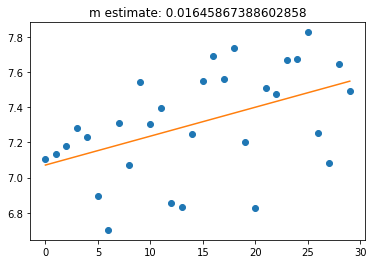

0.263503681716611 0.19279008005449766 std_m


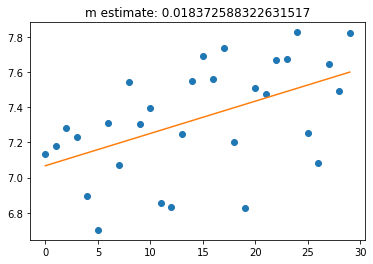

0.26706750600744156 0.19377098076924867 std_m


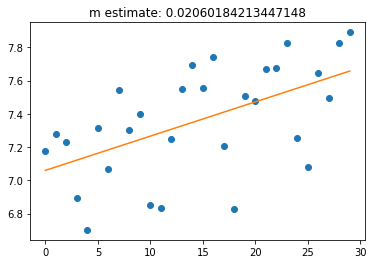

0.270601335082124 0.20047640285756962 std_m


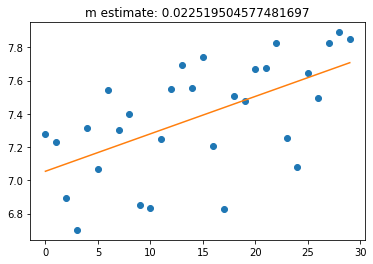

0.2710180975619194 0.19881820406076472 std_m


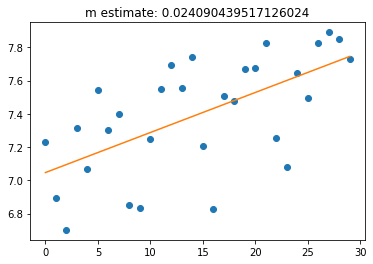

0.2673889162993529 0.2090281555850674 std_m


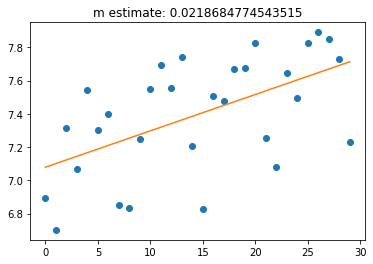

0.28127402795400724 0.19593947123775549 std_m


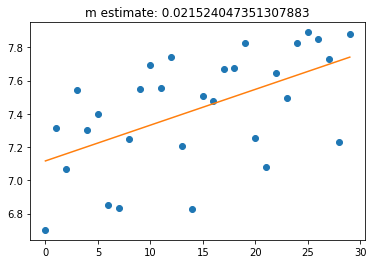

0.28025822809036727 0.19988429418726922 std_m


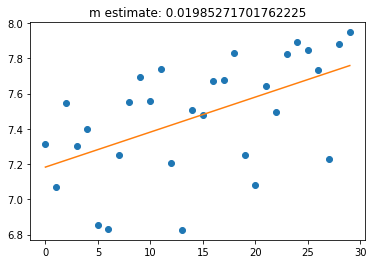

0.27079505980049356 0.1991067892864133 std_m


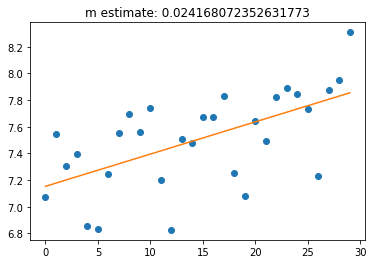

0.28383561754111436 0.1984929592108952 std_m


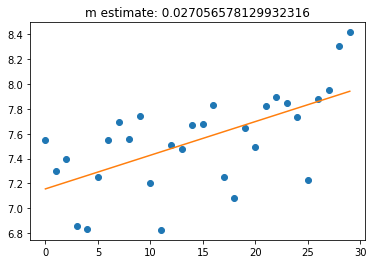

0.2981421290459865 0.1996679248485508 std_m


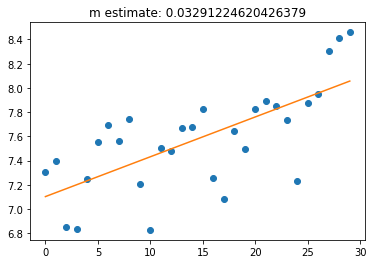

0.29886977211024524 0.2003101172955738 std_m


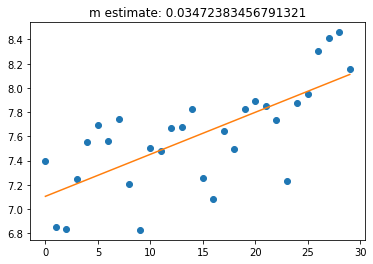

0.2964167986724524 0.2015842619358932 std_m


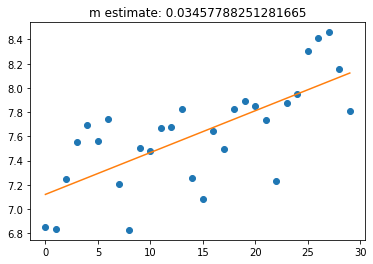

0.29718443257131727 0.19020089373694005 std_m


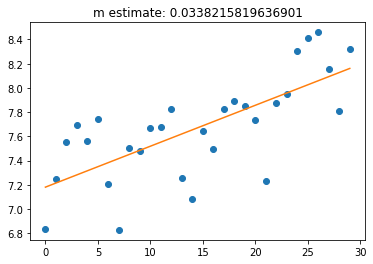

0.2943508448077716 0.19776277126089542 std_m


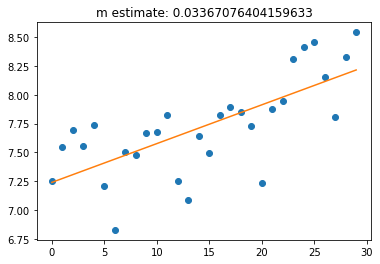

0.2934552149583947 0.19777626030822734 std_m


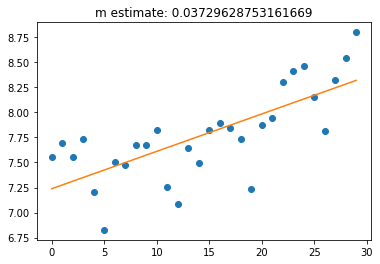

0.3081095585925684 0.19760225107644913 std_m


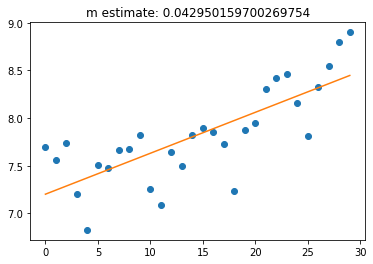

0.314748767934237 0.19977338030570202 std_m


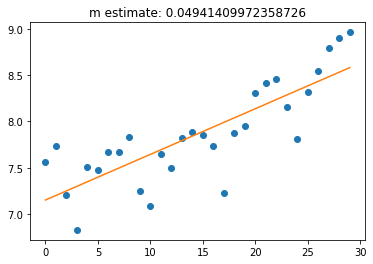

0.30888730357056254 0.198353231318521 std_m


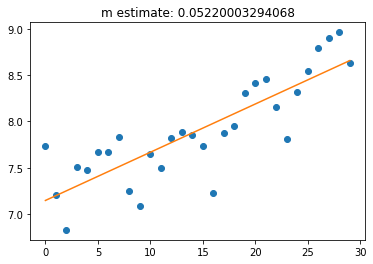

0.2984865099964219 0.19835763813985488 std_m


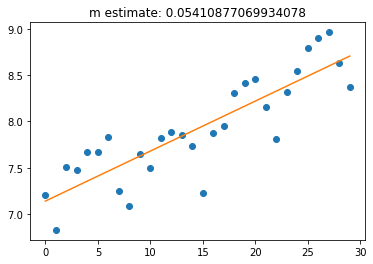

0.28271018471500353 0.19496699134091364 std_m


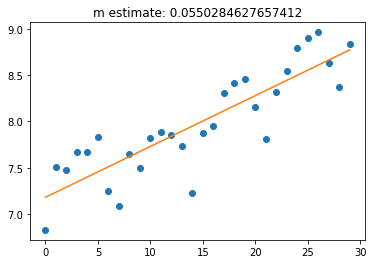

0.28265672866294783 0.20147664222838138 std_m


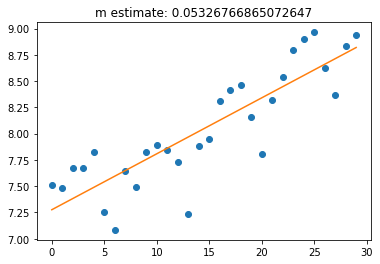

0.27502030514585785 0.19975100788761735 std_m


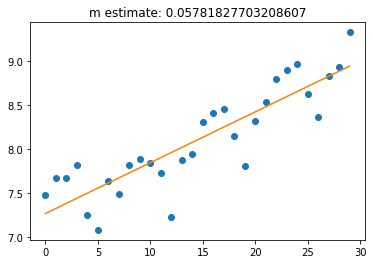

0.2814722426926501 0.19761928153798766 std_m


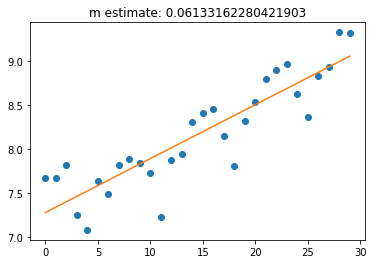

0.2833980285051612 0.20189671990727795 std_m


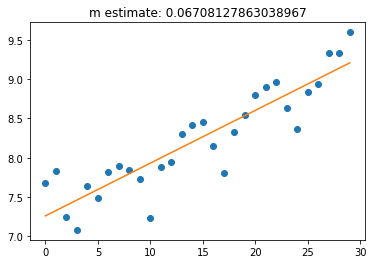

0.28341825214397953 0.20127788219443637 std_m


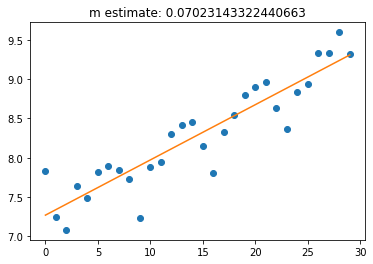

0.2717194478471211 0.1939264213506853 std_m


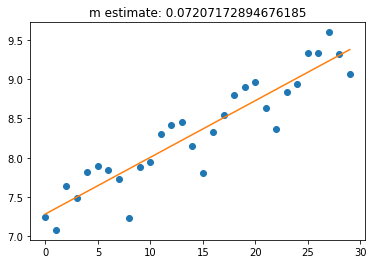

0.2561884470223923 0.18931769658382255 std_m


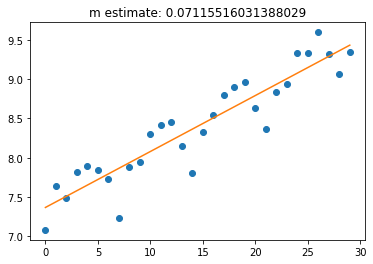

0.25670878629733784 0.18779920930178076 std_m


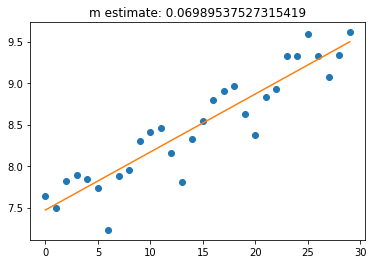

0.2515808581901952 0.18954587188685645 std_m


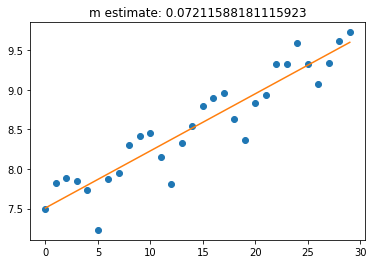

0.25054225154267323 0.18960174099611185 std_m


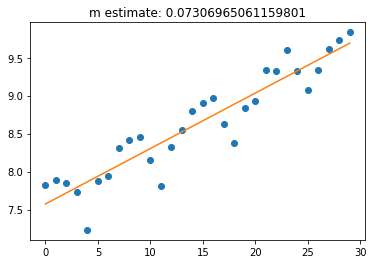

0.252087507235841 0.19319981593571284 std_m


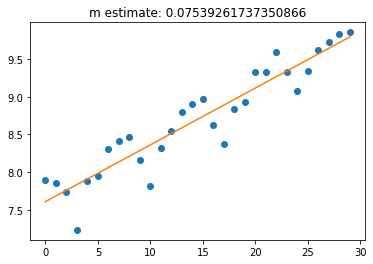

0.24751539396516192 0.18743861739787956 std_m


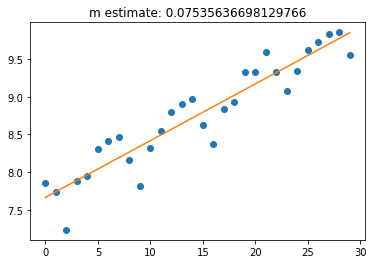

0.24773211296103925 0.17984683619279976 std_m


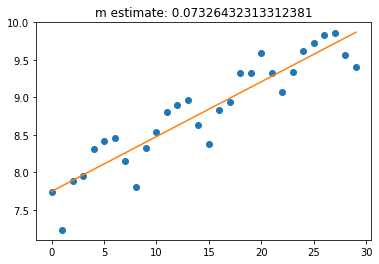

0.26163037144893636 0.16758969157141465 std_m


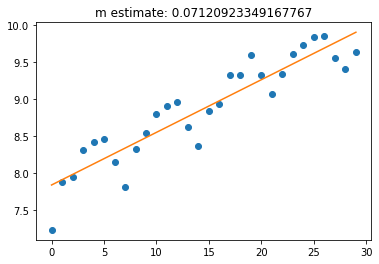

0.26667383755870705 0.16586795367830015 std_m


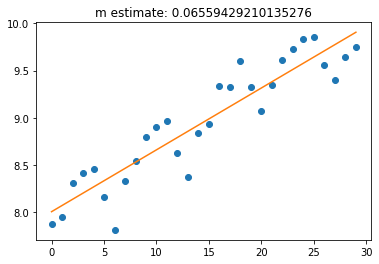

0.2406877717484095 0.16275081490627205 std_m


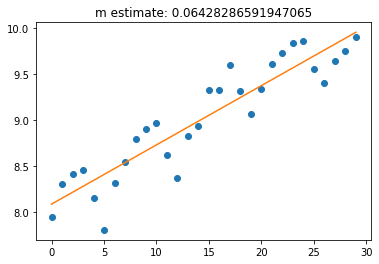

0.23964222482144332 0.1630984789292075 std_m


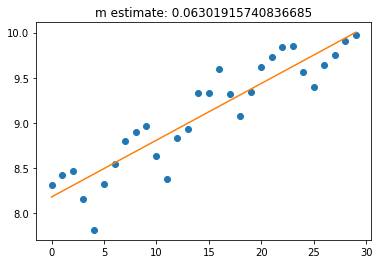

0.2380669262306852 0.16661711314650038 std_m


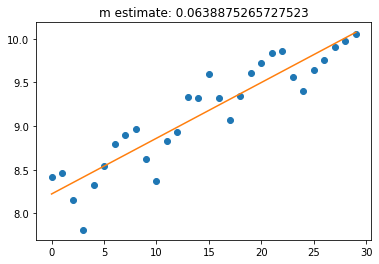

0.23668202504199776 0.16897657482555173 std_m


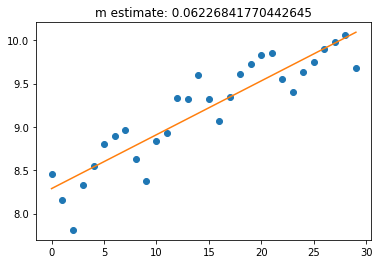

0.2471499733547934 0.16441672872483945 std_m


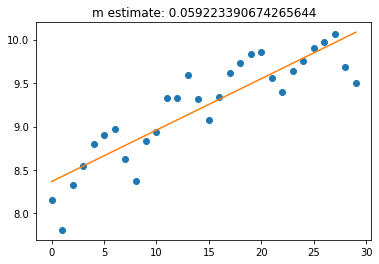

0.27013799811823935 0.15946387438953333 std_m


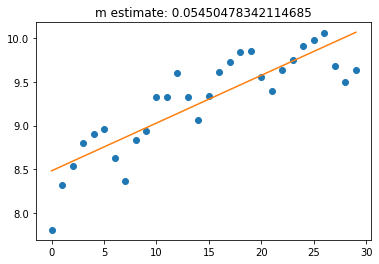

0.2797329930783894 0.15808614193892506 std_m


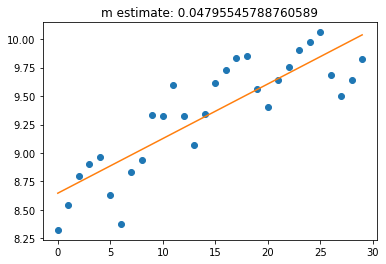

0.2502848072608767 0.14812843858885685 std_m


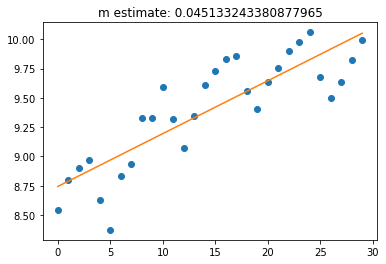

0.24249704673437966 0.14842807308184475 std_m


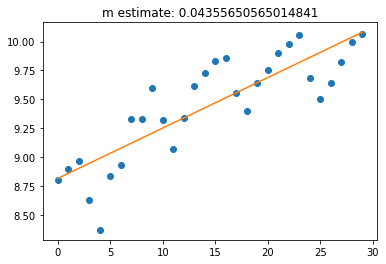

0.23934367424077788 0.148521501498576 std_m


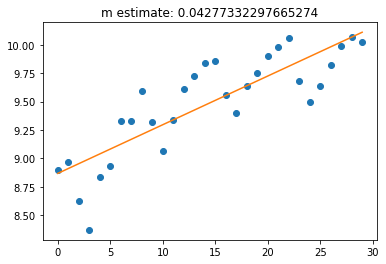

0.23996371766529845 0.15210248116787742 std_m


In [15]:
gamma_all=[]
beta_all=[]
for l1 in range(iterartion-1):
    S_p=S[l1:l1+window_size]
    I_p=I[l1:l1+window_size]
    R_p=R[l1:l1+window_size]
    
    
    en=len(S_p);
    st=0;
    y=np.log(I_p)
    t=np.array(range(st,en))

    m,b=np.polyfit(t,y,1)
    
    y_pre=m*t+b
    
    da2=np.std(y-y_pre)
    
    
    plt.plot(t,(y),'o')
    plt.plot(t,(m*t+b))
    plt.title('m estimate: %s' %m)
    plt.show()

    g=[]
    for i in range(st,en-1):
        oo=(R_p[i+1]-R_p[i])/I_p[i]
        g.append(oo)


    gamma=np.mean(g)
    gamma_std=np.std(g)
    
    print(da2,gamma_std,'std_m')
    beta=m+gamma
    
    gamma_all.append(gamma)
    beta_all.append(beta)
    
    
    
    

Text(0.5, 0, 'Date')

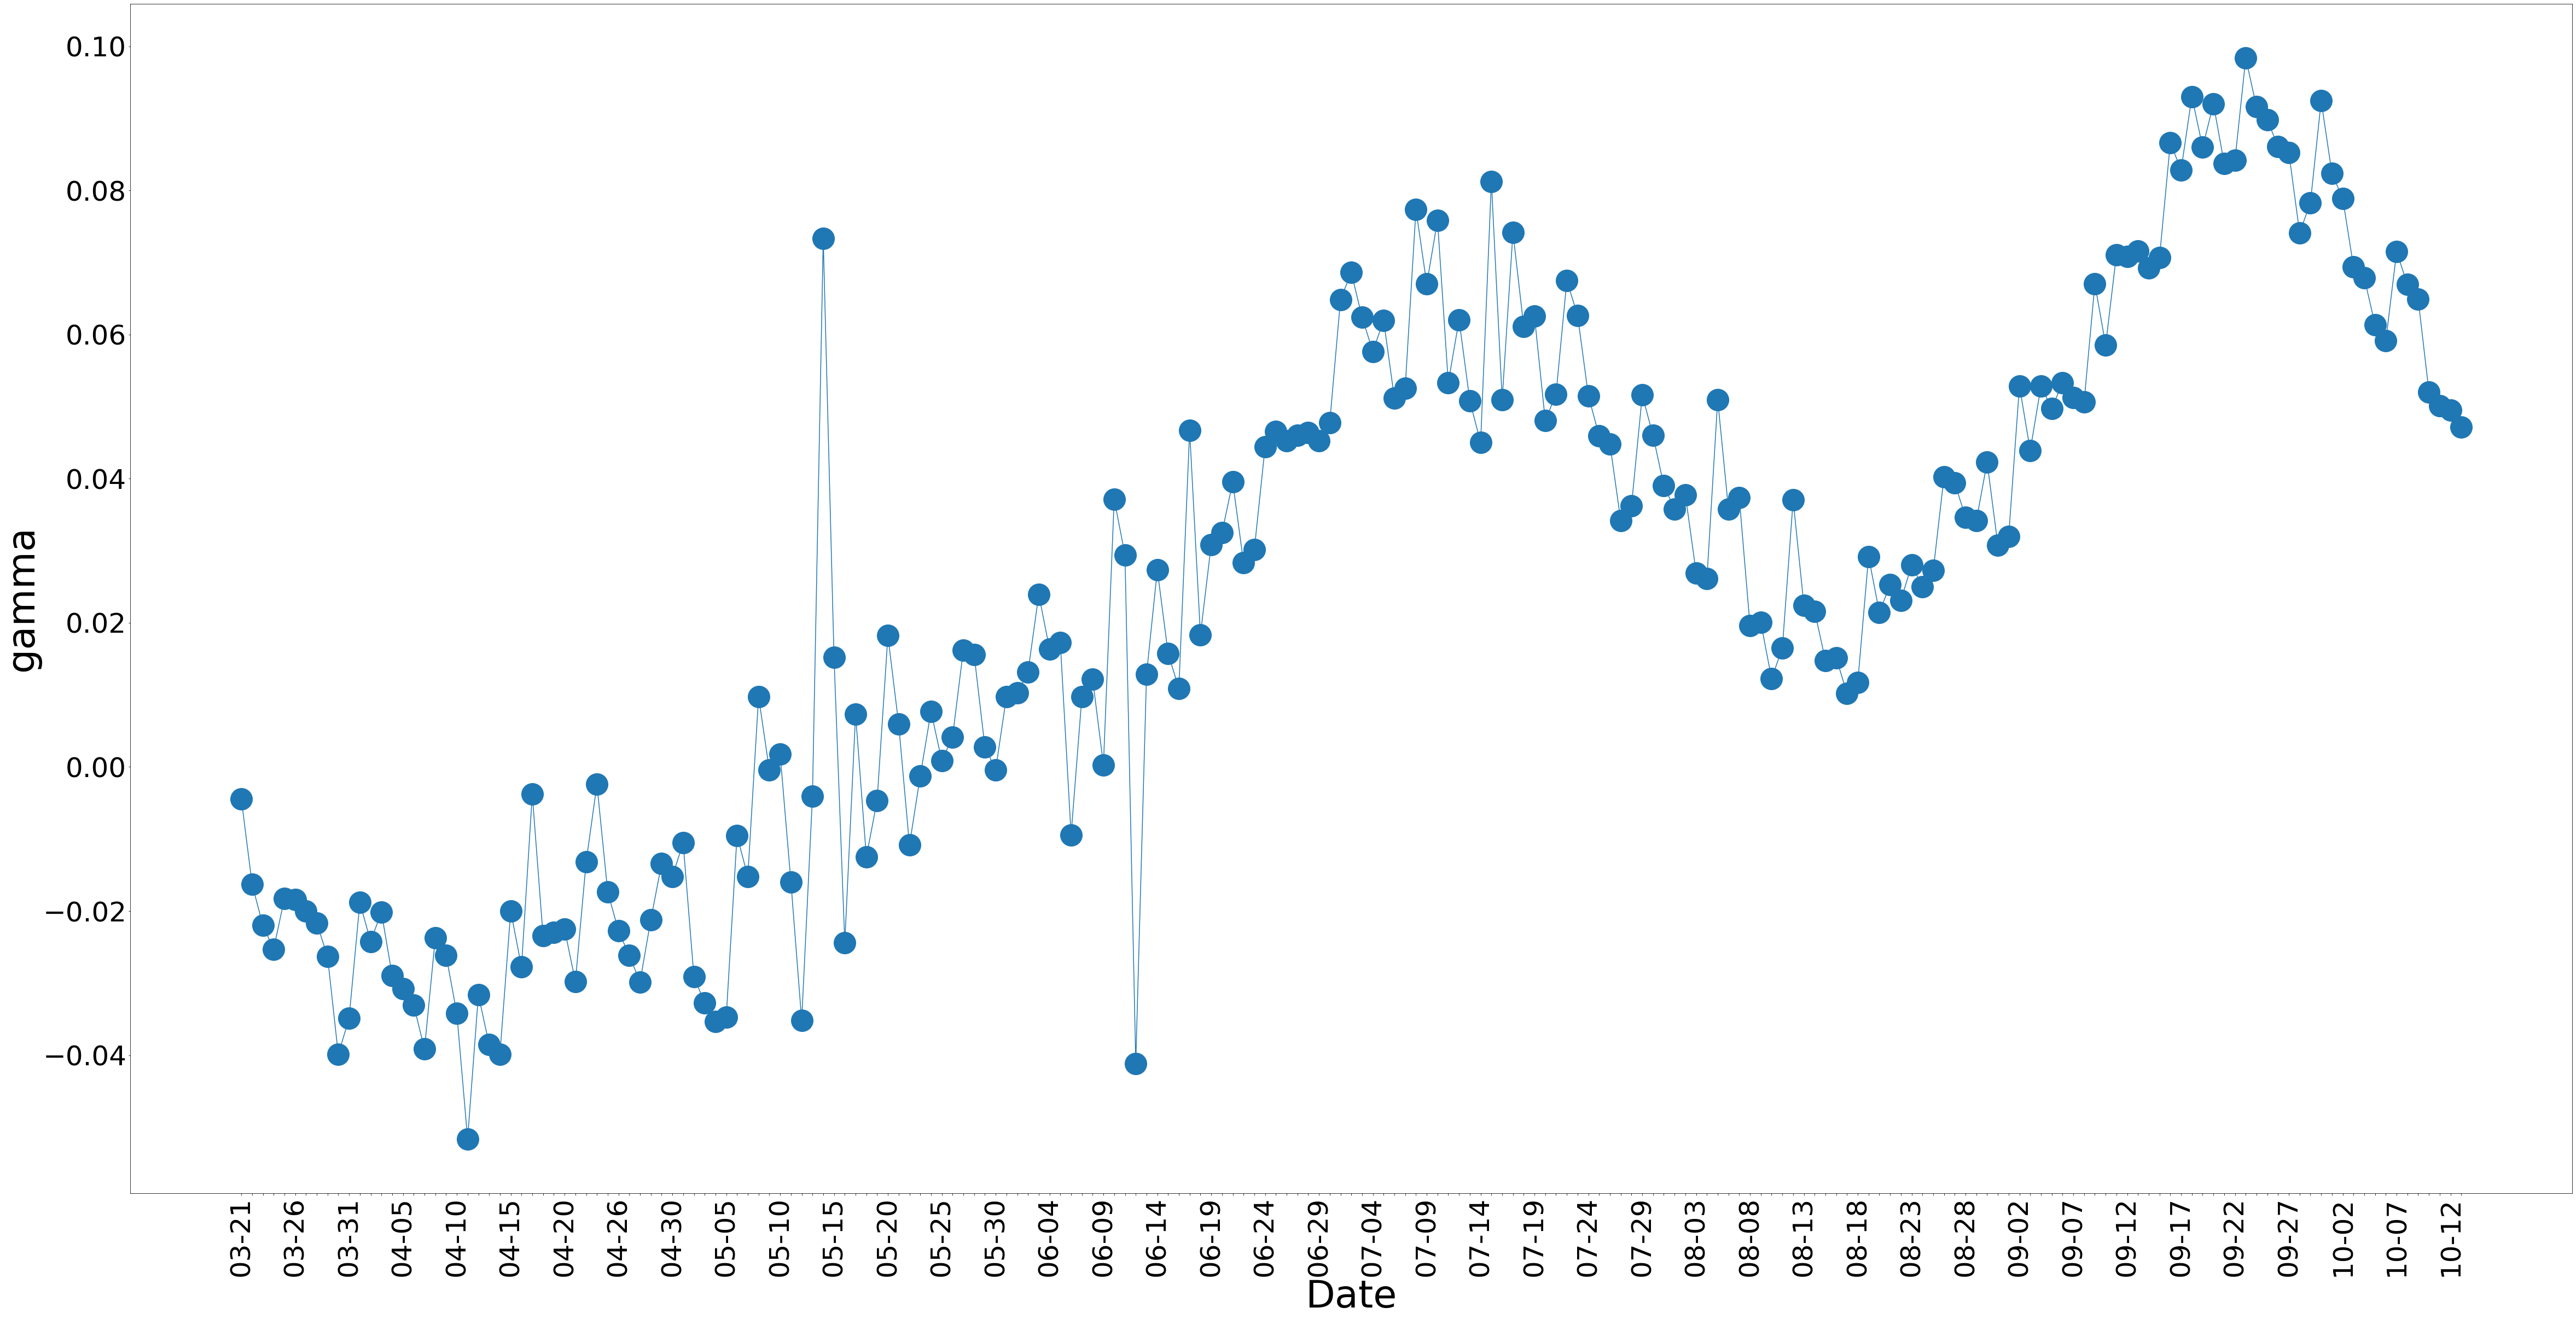

In [14]:
plt.figure(figsize=(80,40))
#plt.xticks(rotation=90,fontsize=30)
#plt.plot(dates[:len(gamma_all)],gamma_all,'o',markersize=20)
plt.plot(gamma_all,'-o',markersize=40)
#plt.xticks(rotation=90)
plt.xticks(np.arange(len(dates[:len(gamma_all)])), dates[:len(gamma_all)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('gamma',fontsize=70)
plt.xlabel('Date',fontsize=70)
#plt.xticks(fontsize=30)

Text(0.5, 0, 'Date')

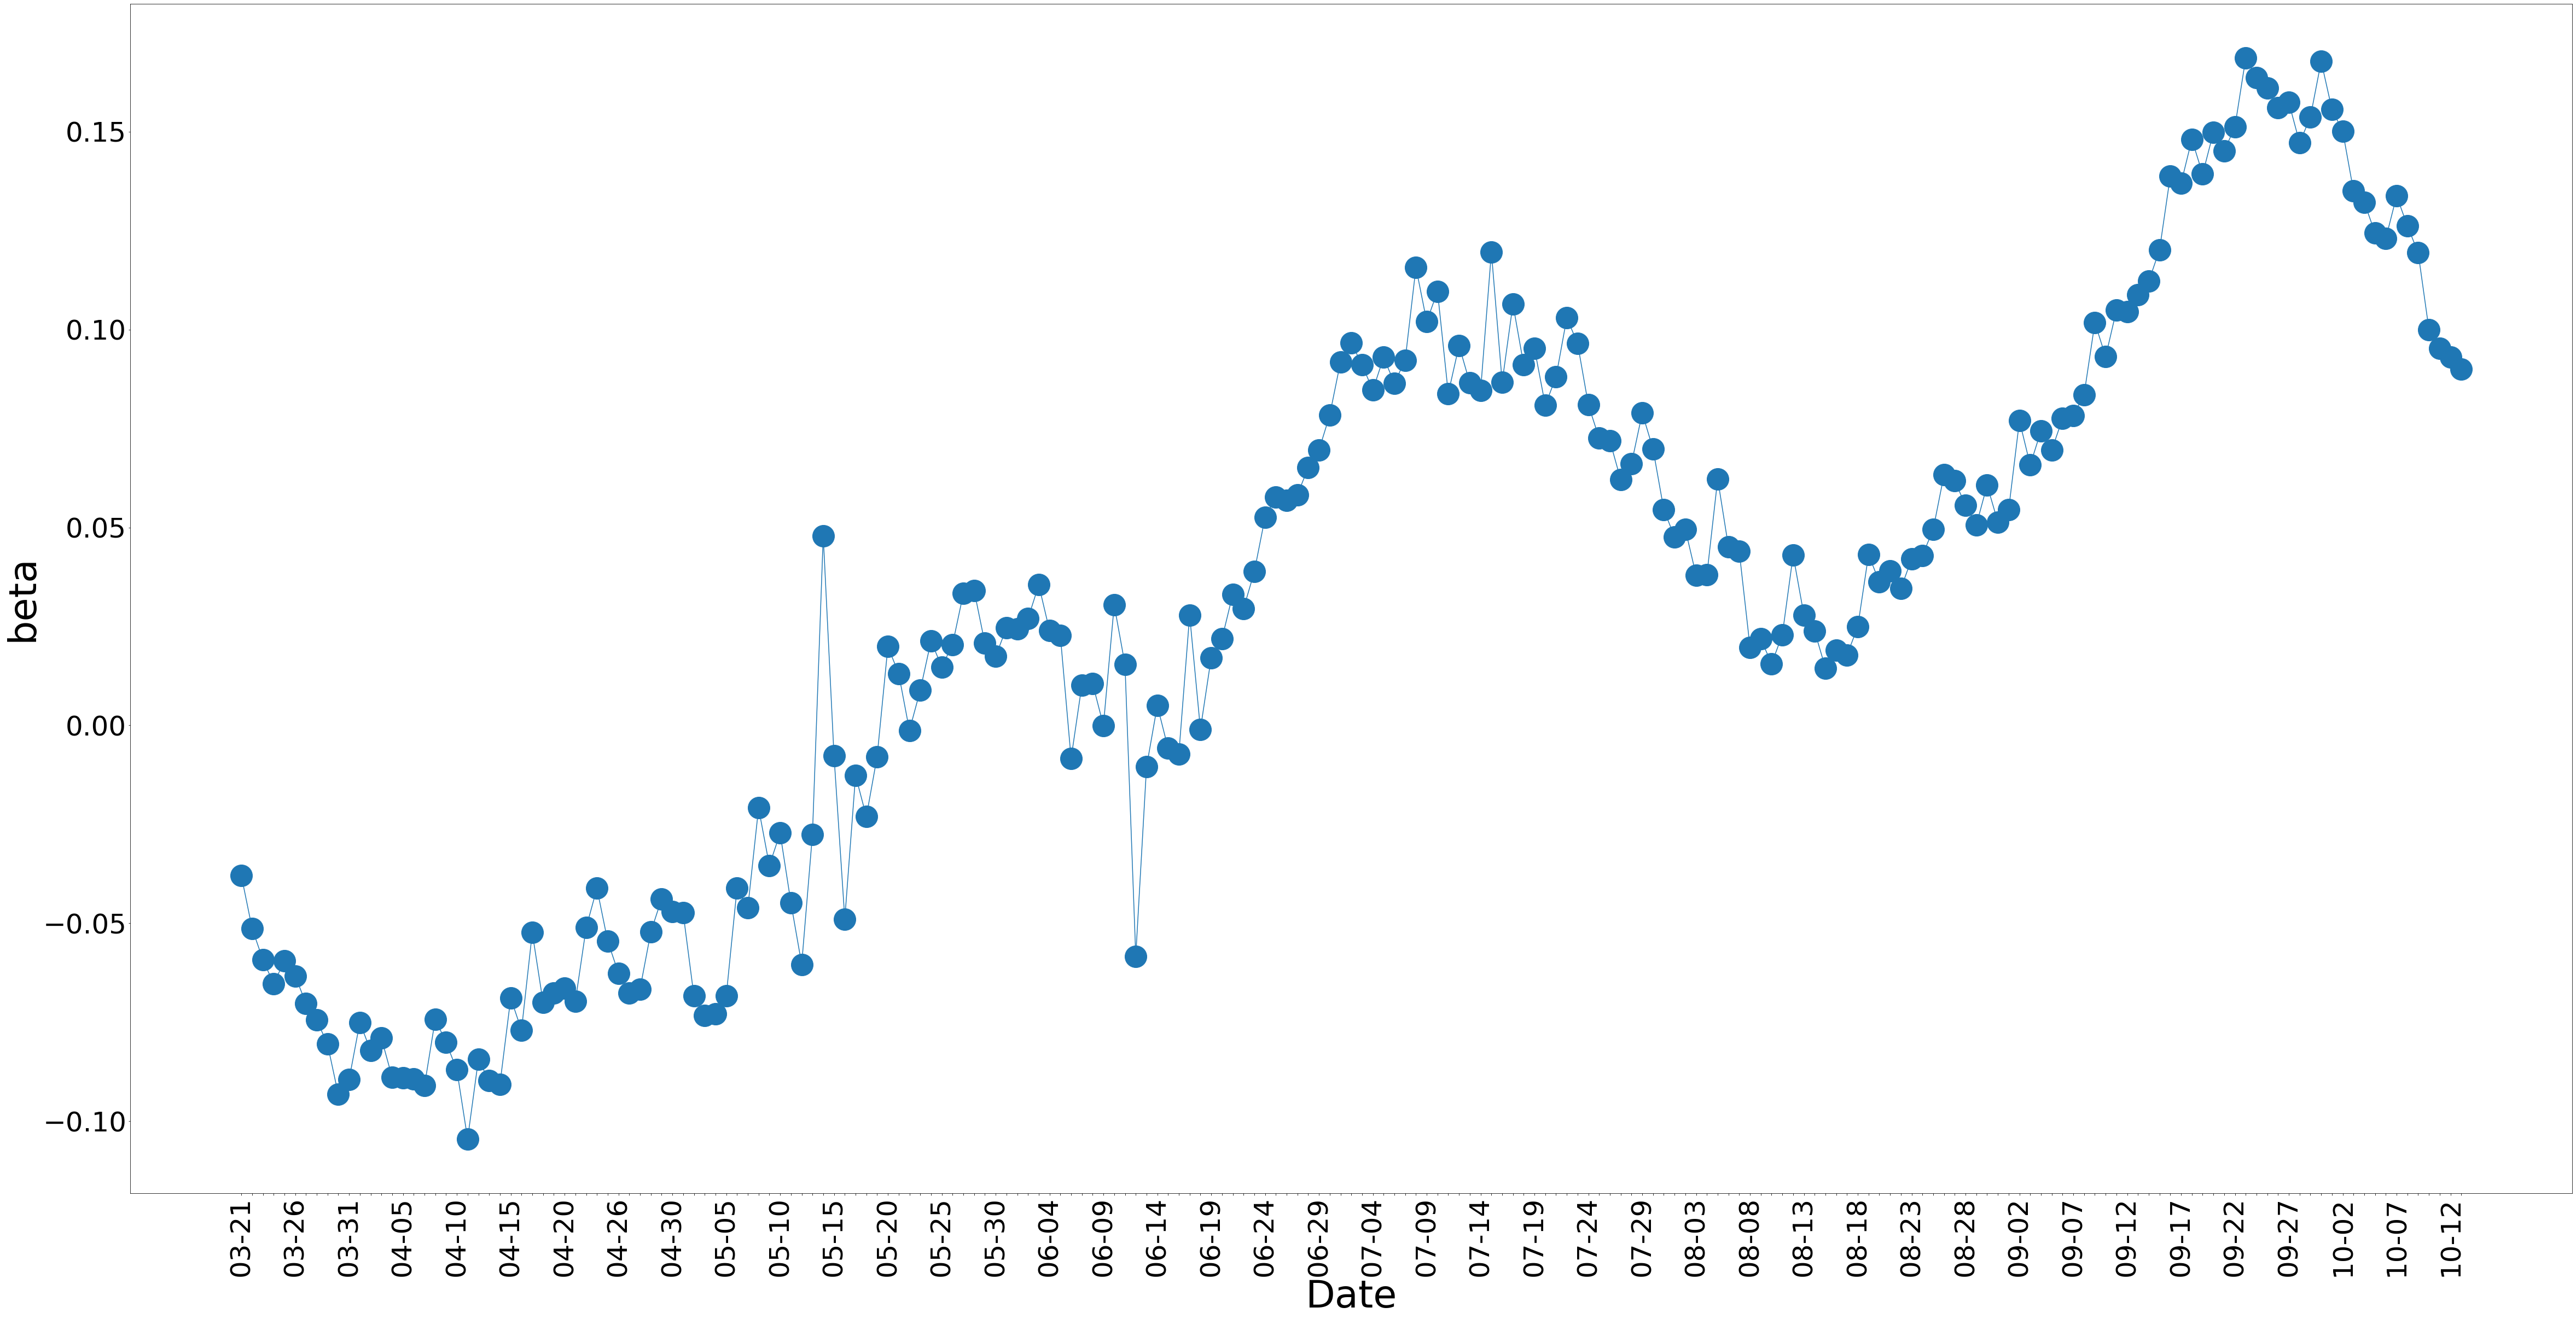

In [15]:
plt.figure(figsize=(80,40))
plt.plot(beta_all,'-o',markersize=40)
plt.xticks(np.arange(len(dates[:len(beta_all)])), dates[:len(beta_all)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('beta',fontsize=70)
plt.xlabel('Date',fontsize=70)

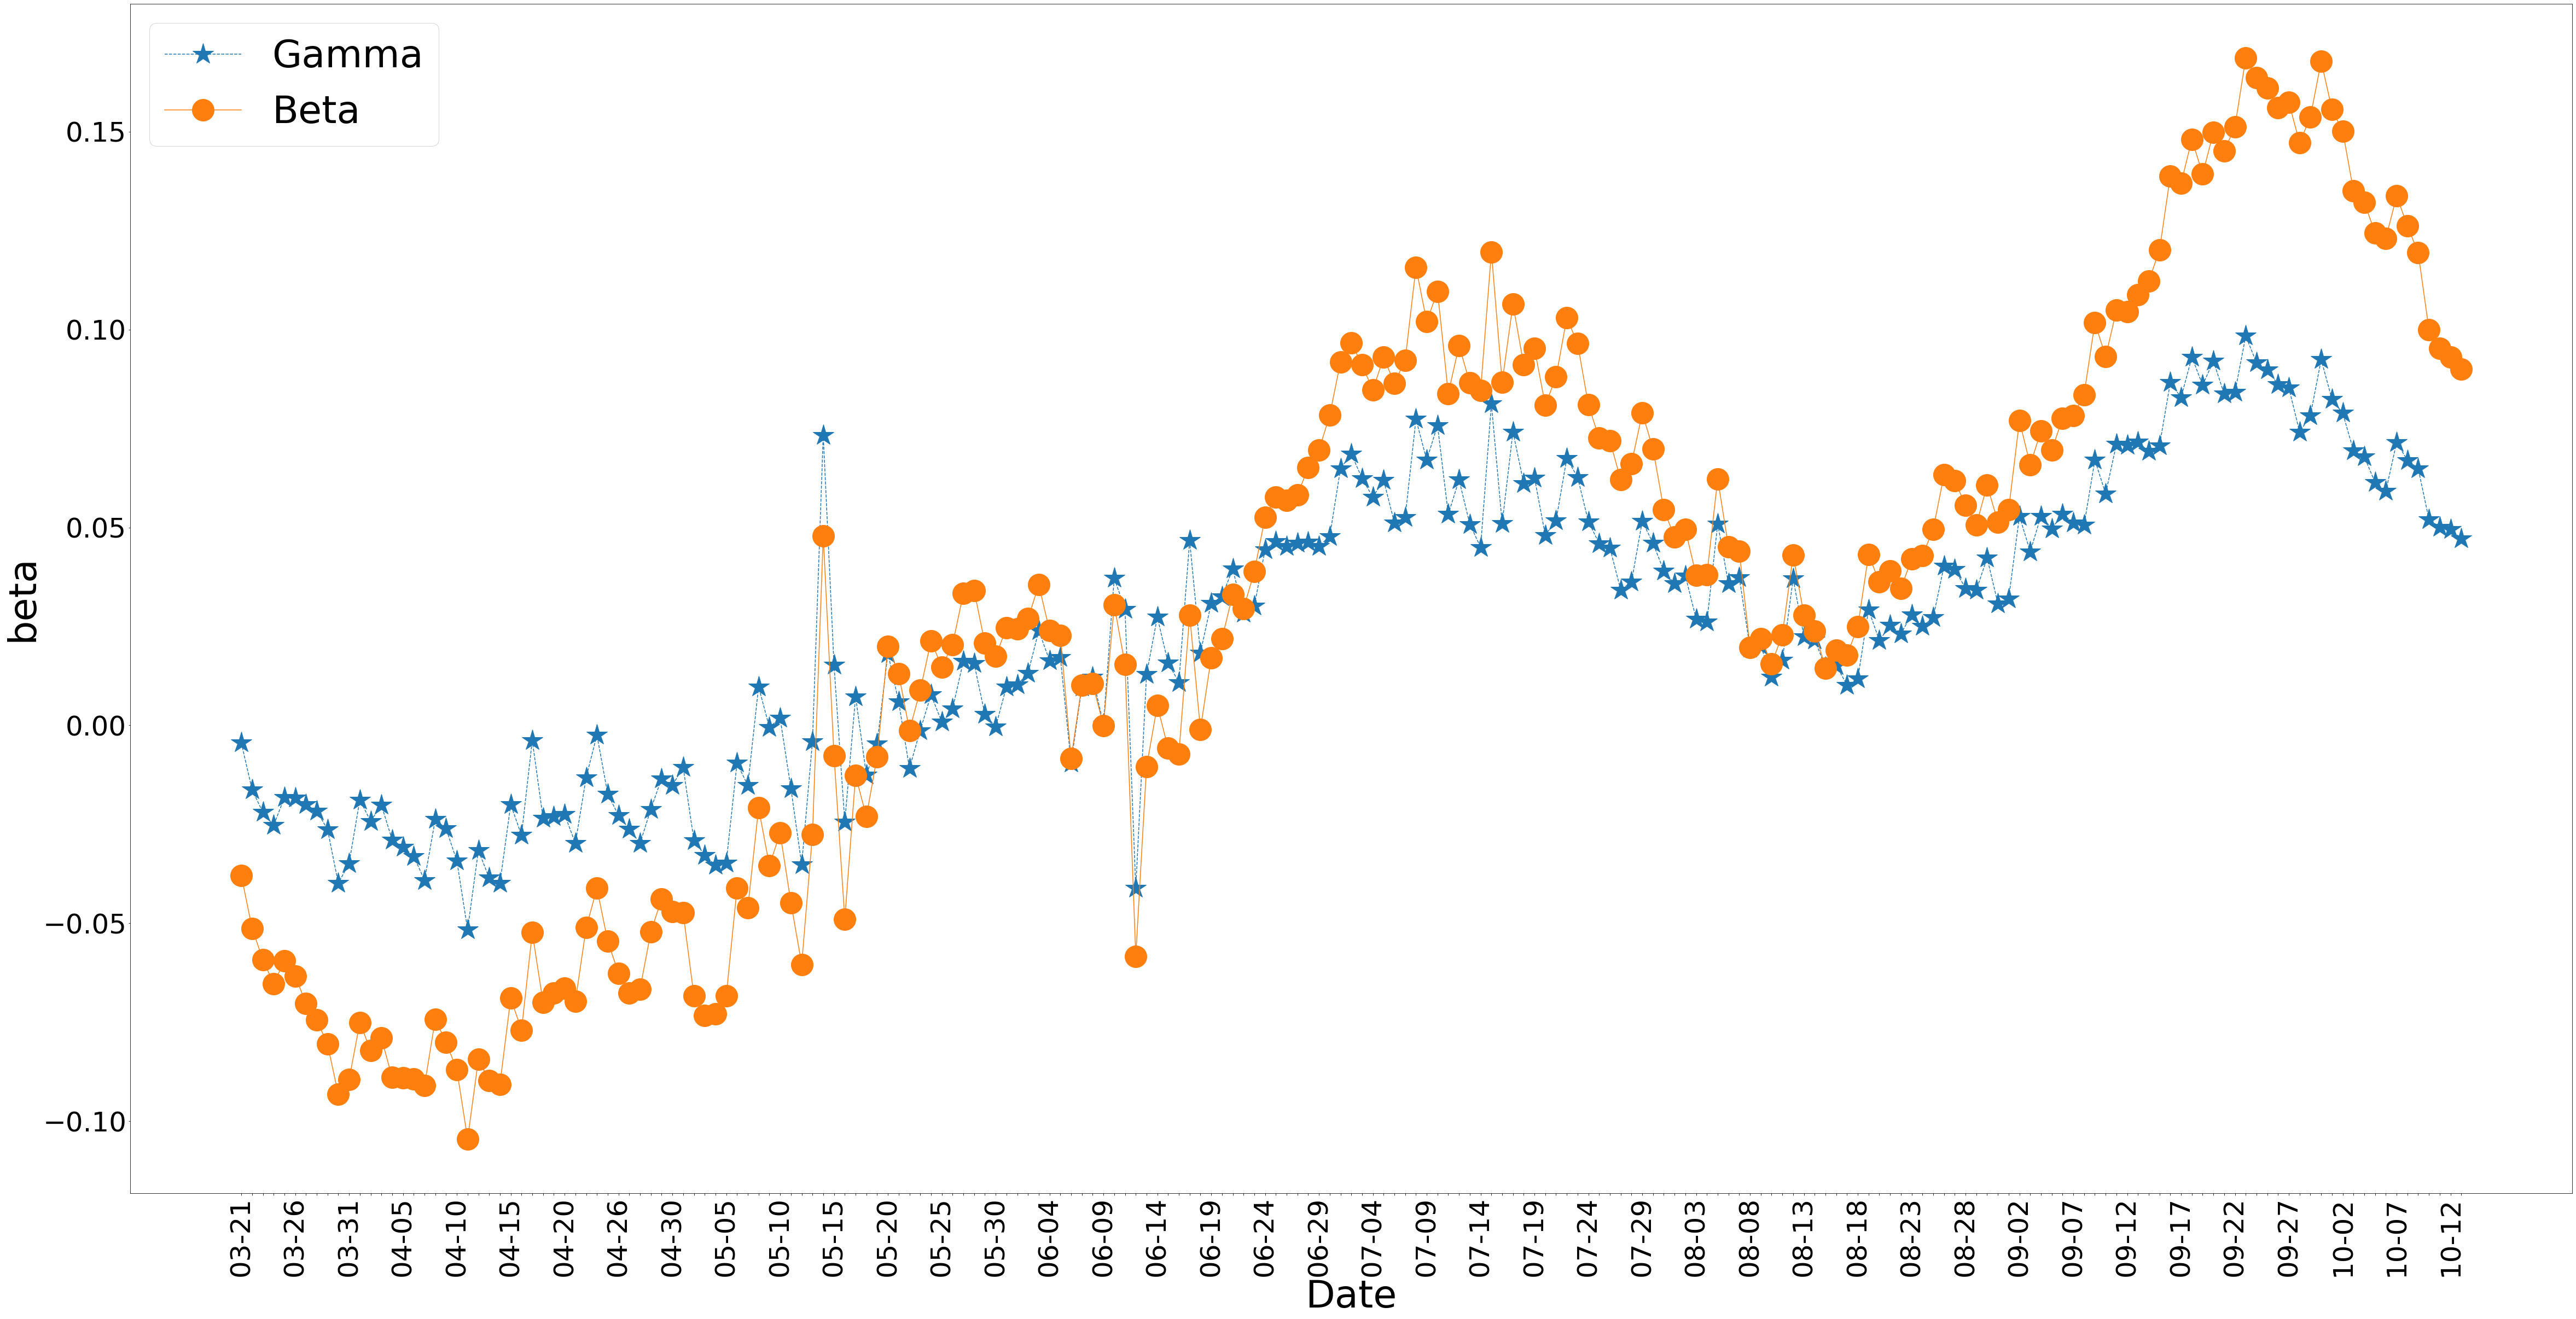

In [16]:
plt.figure(figsize=(80,40))
plt.plot(gamma_all,'--*',markersize=40,label='Gamma')
plt.plot(beta_all,'-o',markersize=40,label='Beta')
plt.xticks(np.arange(len(dates[:len(beta_all)])), dates[:len(beta_all)],rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel('beta',fontsize=70)
plt.xlabel('Date',fontsize=70)
plt.legend(loc=0,fontsize=70)